In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from builtins import *

import os 
import anypytools
from anypytools import AnyMacro
from anypytools import AnyPyProcess
from anypytools.macro_commands import ( MacroCommand, Load, SetValue, SetValue_random,  Dump, SaveDesign,
                                        LoadDesign, SaveValues, LoadValues, UpdateValues, OperationRun)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
folderlist = ["./"]
workdir = os.getcwd()

list_markers = [
    'Sternum', 'Neck', 'Lumbar', 'Xiphoid', 'Thoracic', 'RAsis', 'LAsis','RPsis', 'LPsis', 
    'RShoulder', 'RElbow', 'RWrist', 'RRadius', 'RUlna', 
    'LShoulder', 'LElbow', 'LWrist', 'LRadius', 'LUlna', 
    'RThighSuperior', 'RThighInferior', 'RThighLateral', 'RShankSuperior', 'RShankInferior', 'RShankLateral',
    'LThighSuperior', 'LThighInferior', 'LThighLateral', 'LShankSuperior', 'LShankInferior', 'LShankLateral',
    'RHeel', 'RToe', 'RToeMedial', 'RToeLateral', 
    'LHeel', 'LToe', 'LToeMedial', 'LToeLateral'
]
list_analogs = [
    #'Fx3', 'Fy3', 'Fz2', 'Mx3', 'My3', 'Mz3',
    'Fx2', 'Fy2', 'Fz2', 'Mx2', 'My2', 'Mz2',
    'Fx1', 'Fy1', 'Fz1', 'Mx1', 'My1', 'Mz1'
]
list_params_markers = [ 'Main.C3DObject.Points.Markers.' + marker_name + '.Pos' for marker_name in list_markers ]
list_params_analogs = [ 'Main.C3DObject.Analog.Data.' + analog_name for analog_name in list_analogs ]
list_params_freqs = [
    'Main.C3DObject.Header.VideoFrameRate', 'Main.C3DObject.Header.NoAnalogSamplesPer3DFrame'
]

#print(list_params)

In [3]:
list_macro = []
case_index = 0

C3DFileName = 'jw_stairupf1.c3d'
for i in range(1):
    defines = {          
      "DEF_DEFAULT_C3D_FILE_NAME": '"'+C3DFileName+'"'
    }
    macro = [ 
        Load('{}'.format(os.path.join(workdir, 'C3DTest.main.any')), defs = defines), 
        Dump(list_params_markers), Dump(list_params_analogs), Dump(list_params_freqs)
    ]
    list_macro.append(macro)
    case_index += 1
     
#print(list_macro)

In [4]:
app = AnyPyProcess(keep_logfiles=False,
    ignore_errors=["Model delete  :  Unknown error"],
    warnings_to_include = ["Failed"],
    anybodycon_path='C:\Program Files\AnyBody Technology\AnyBody.7.1\AnyBodyCon.exe',
    num_processes = 4, return_task_info = True)  

result = app.start_macro(list_macro)

A Jupyter Widget

A Jupyter Widget

In [5]:
from ResidualAnalysis import residual_analysis

Marker name =  Sternum


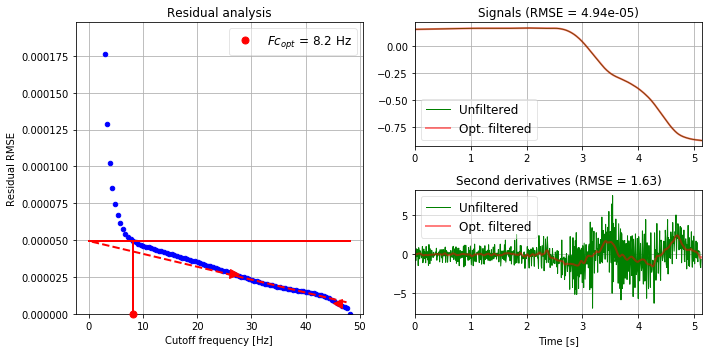

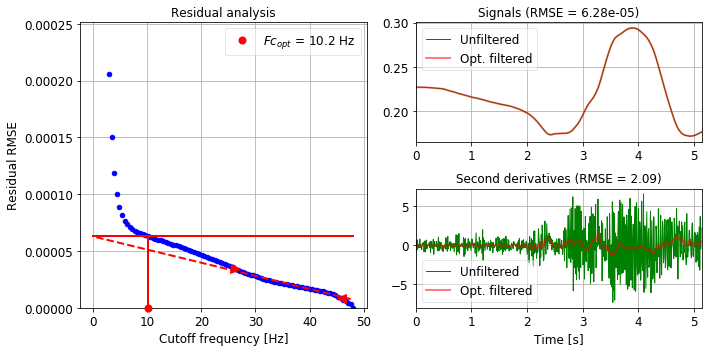

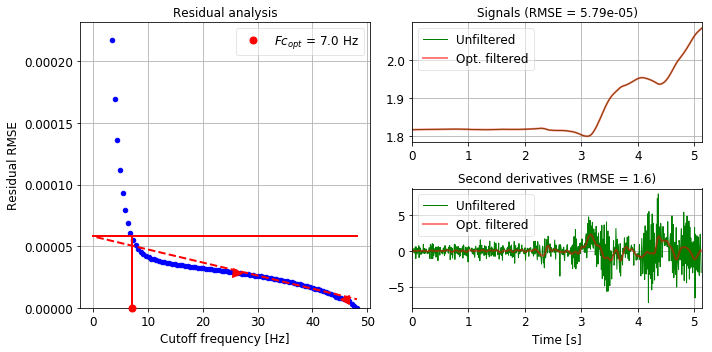

Marker name =  Neck


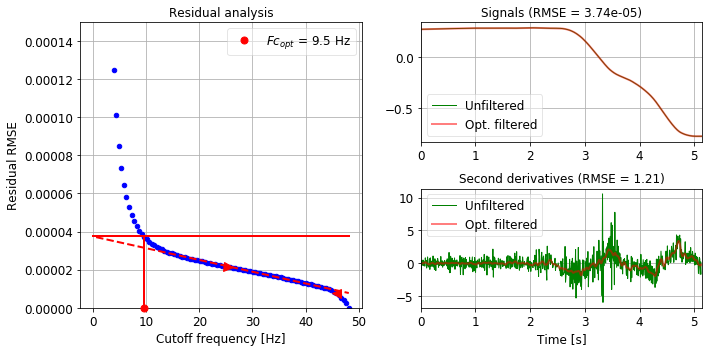

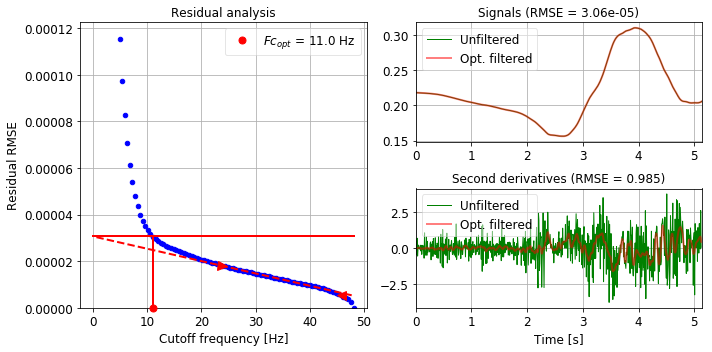

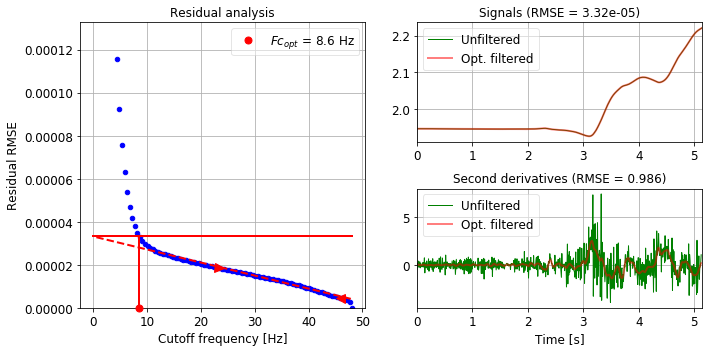

Marker name =  Lumbar


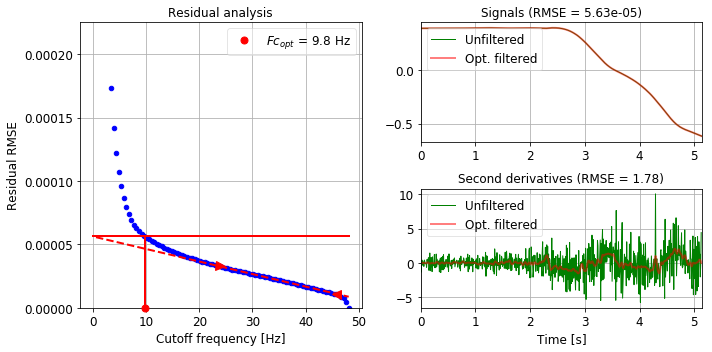

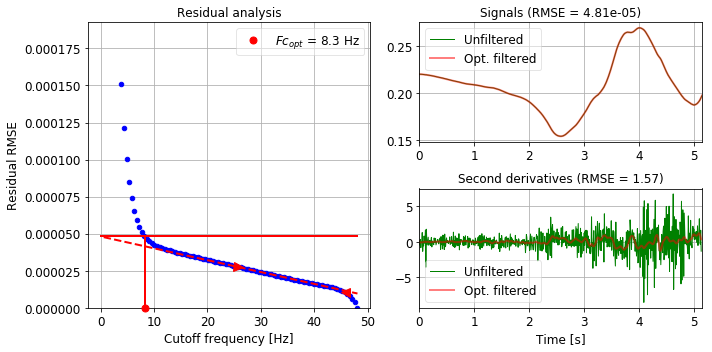

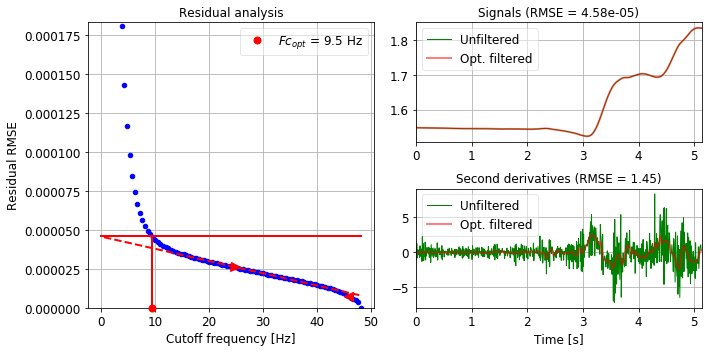

Marker name =  Xiphoid


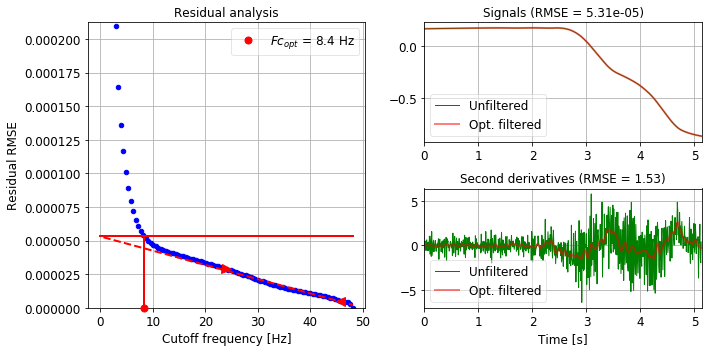

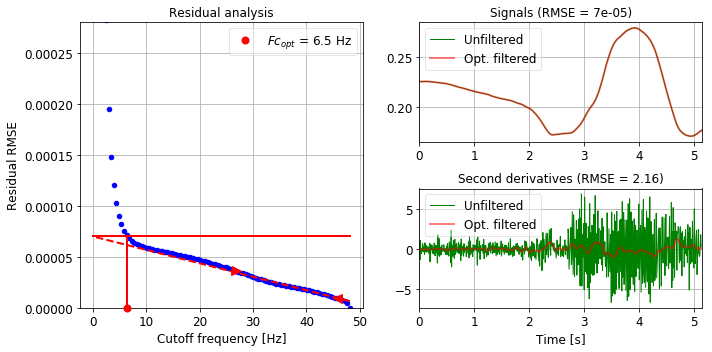

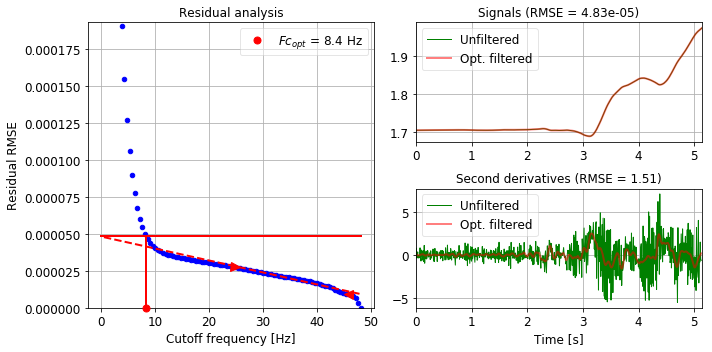

Marker name =  Thoracic


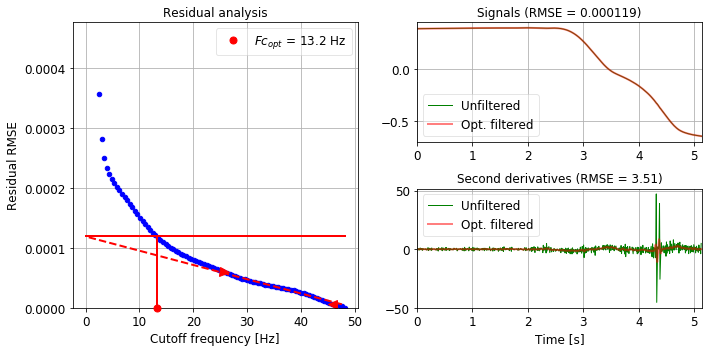

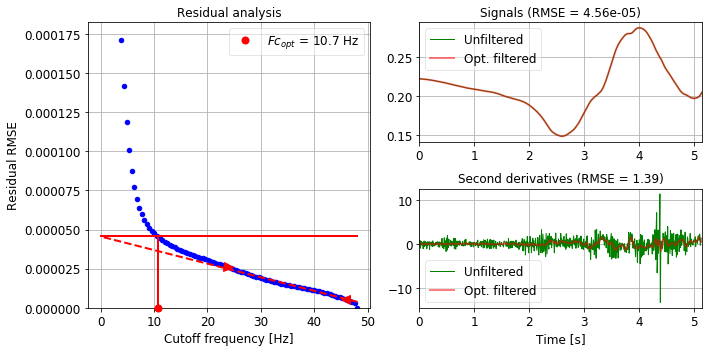

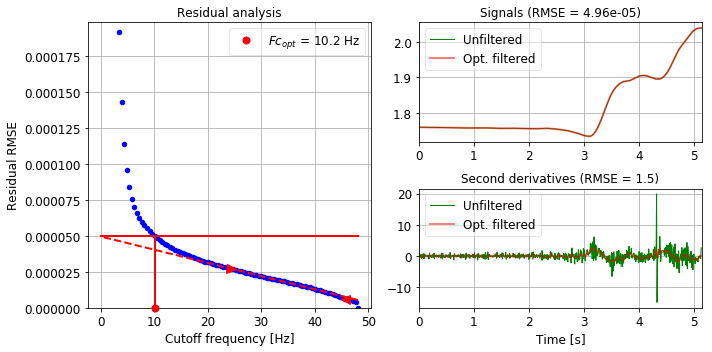

Marker name =  RAsis


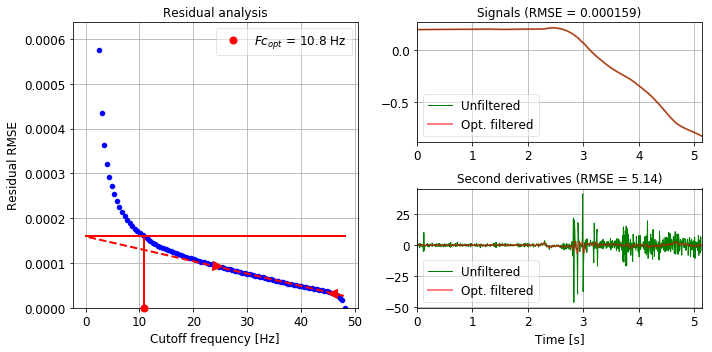

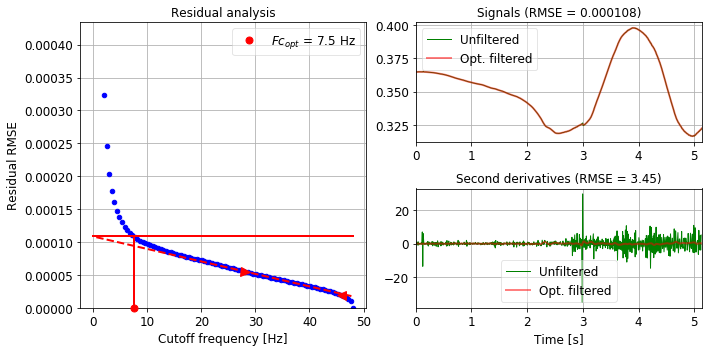

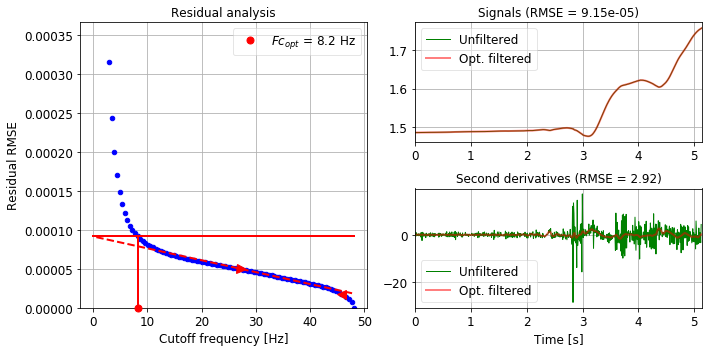

Marker name =  LAsis


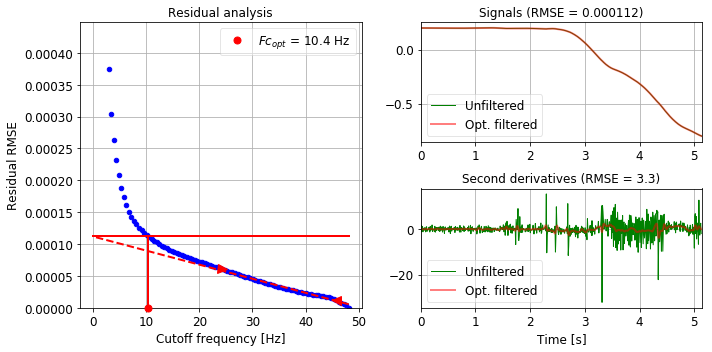

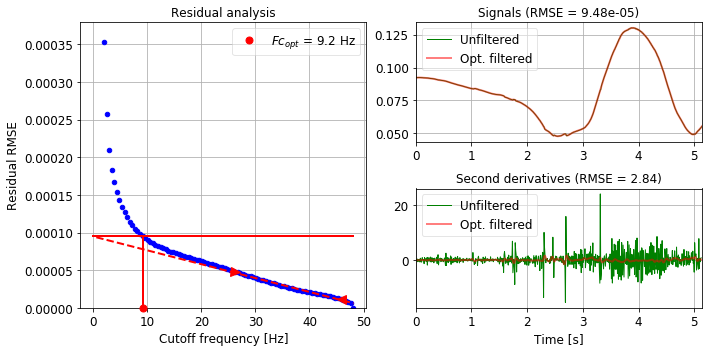

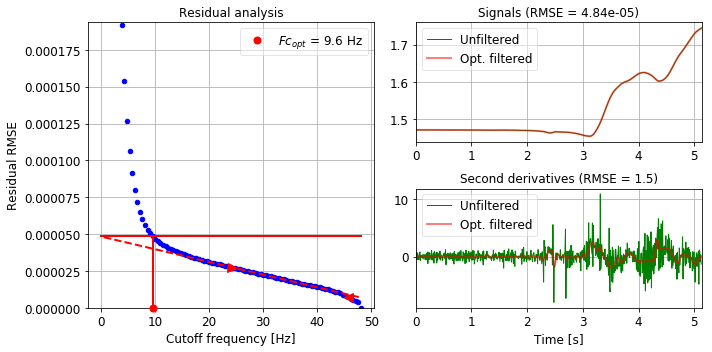

Marker name =  RPsis


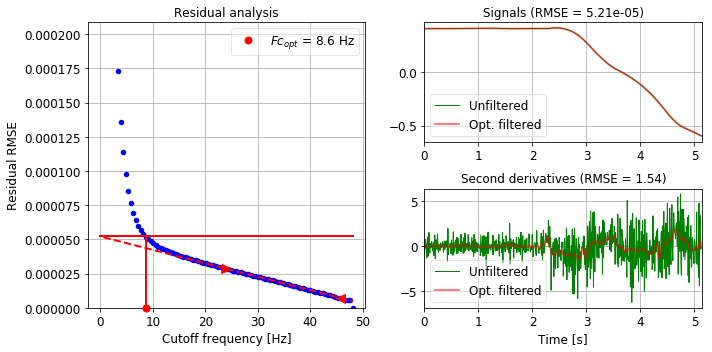

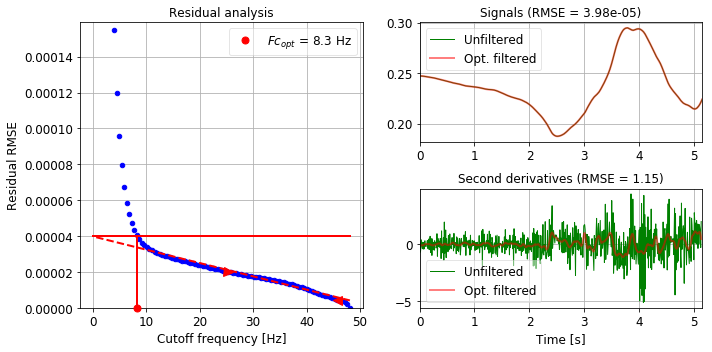

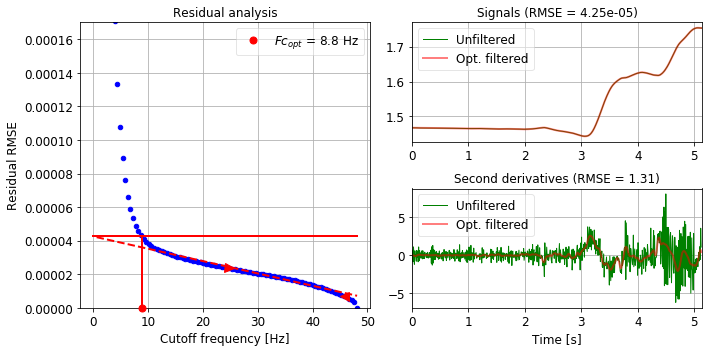

Marker name =  LPsis


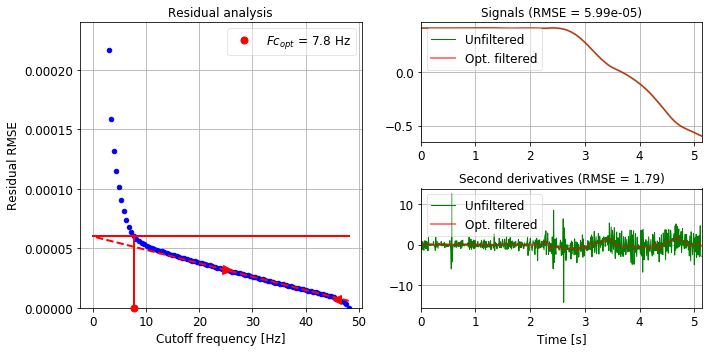

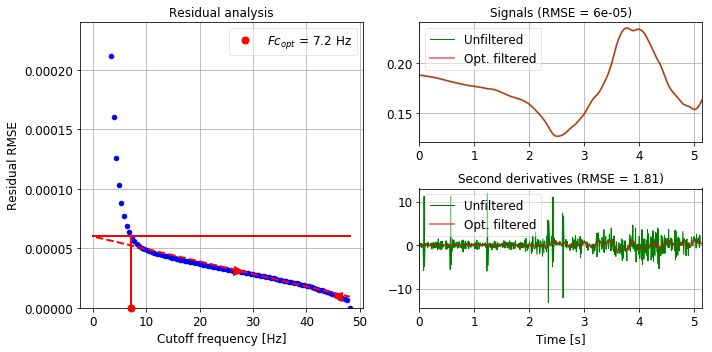

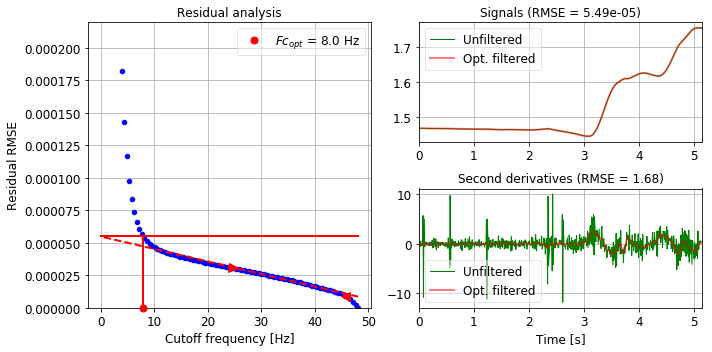

Marker name =  RShoulder


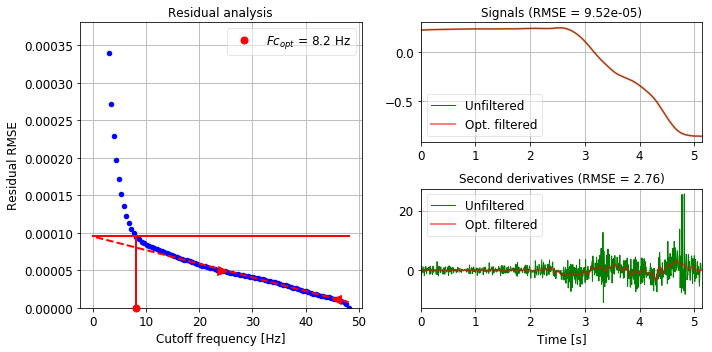

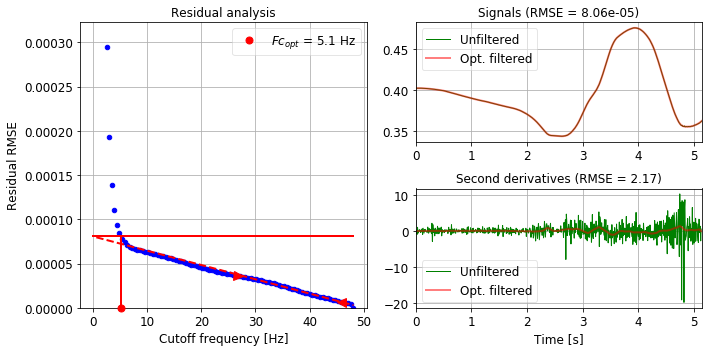

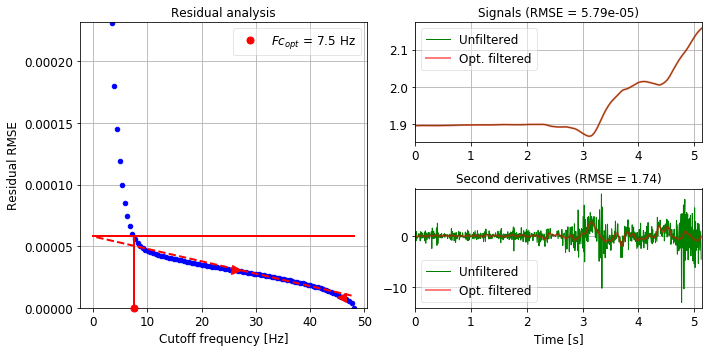

Marker name =  RElbow


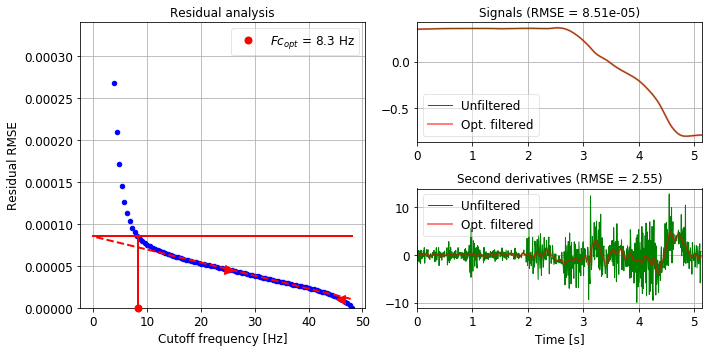

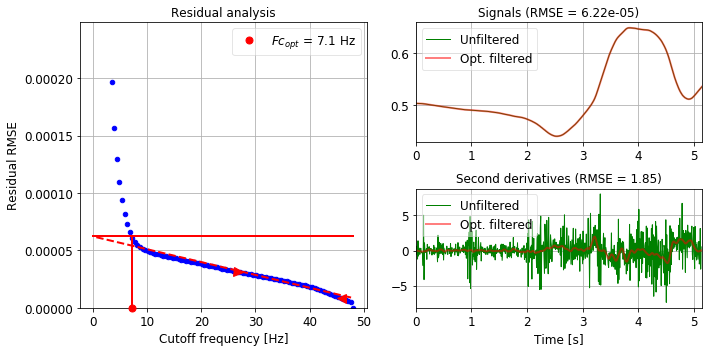

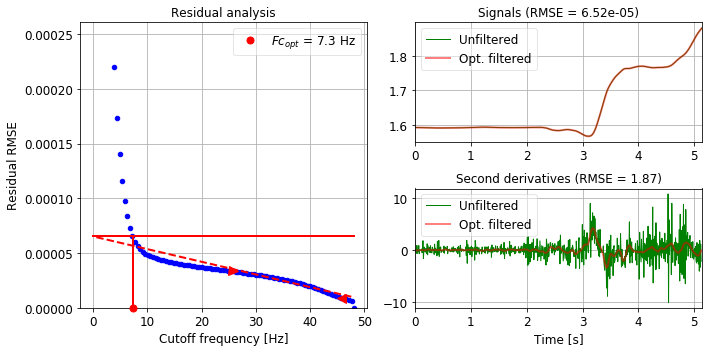

Marker name =  RWrist


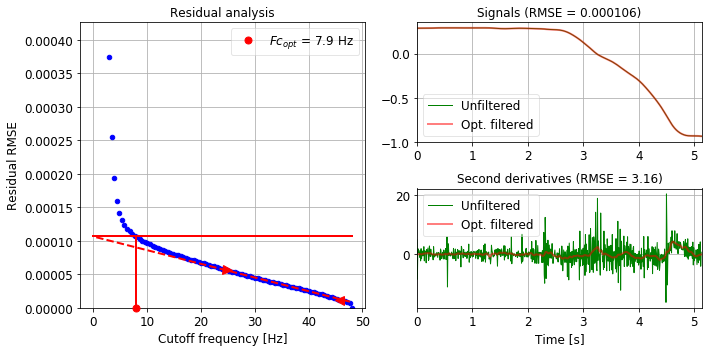

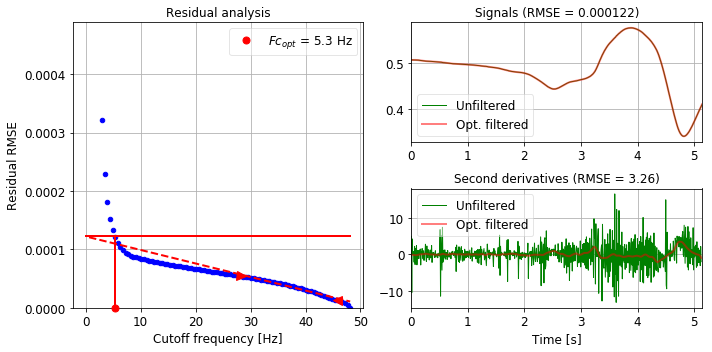

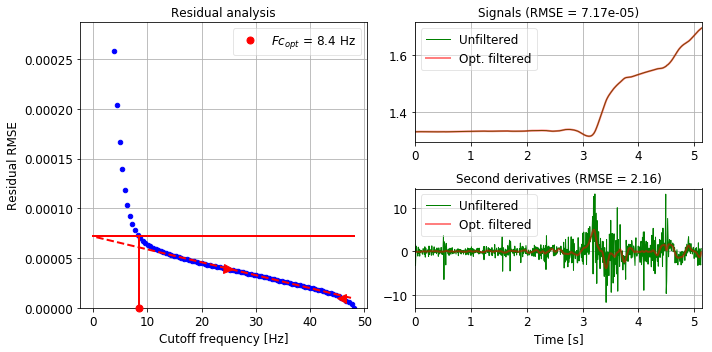

Marker name =  RRadius


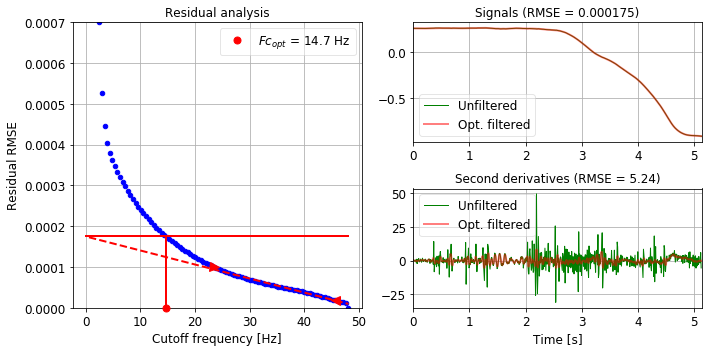

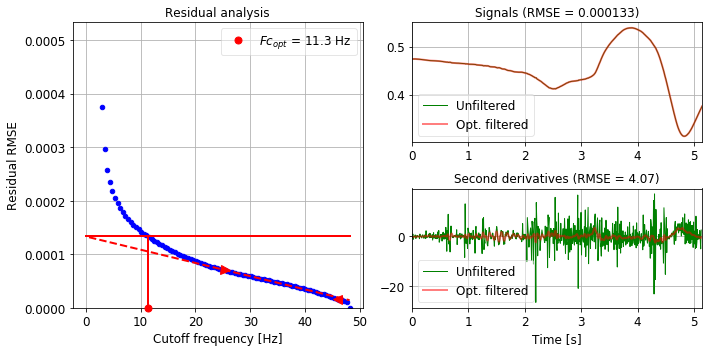

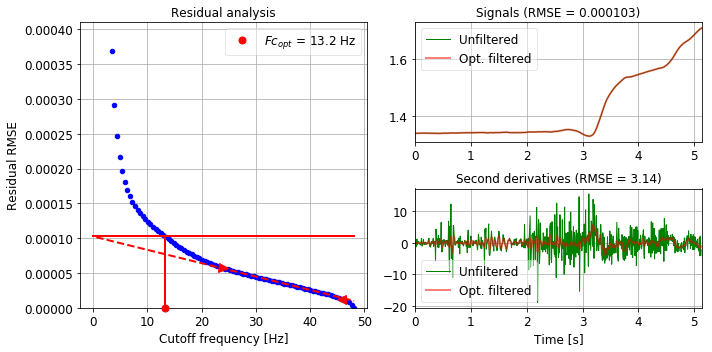

Marker name =  RUlna


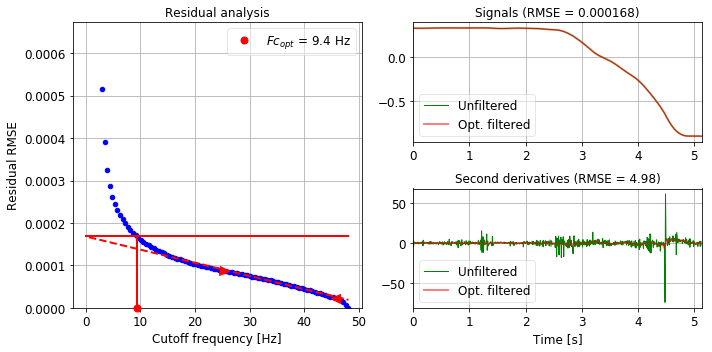

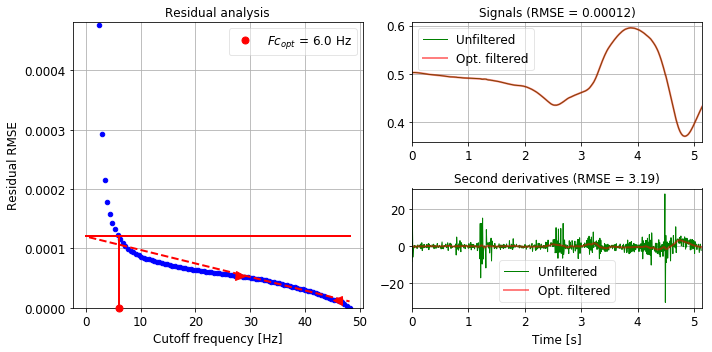

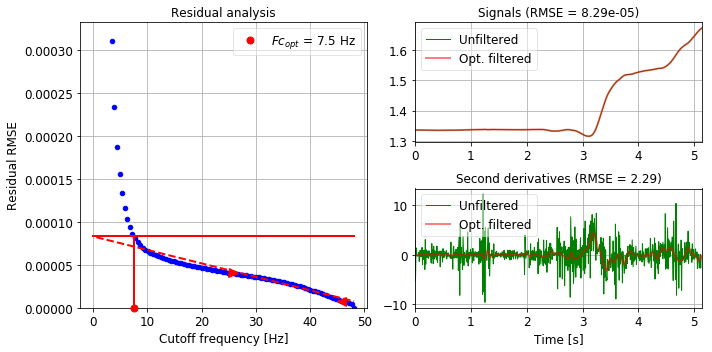

Marker name =  LShoulder


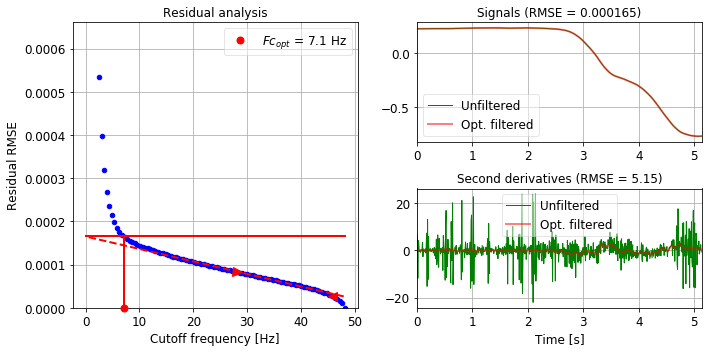

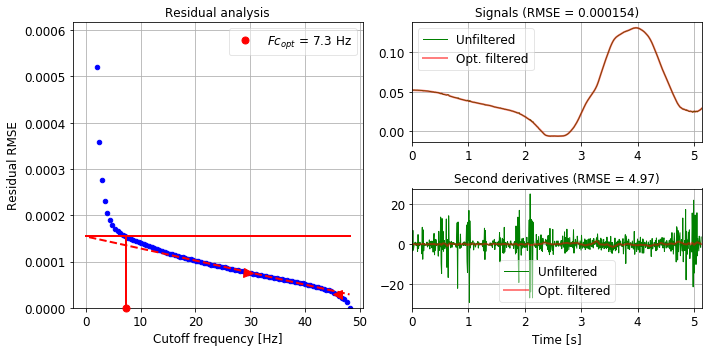

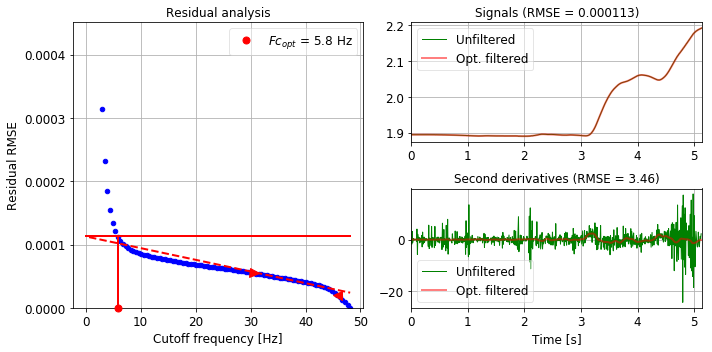

Marker name =  LElbow


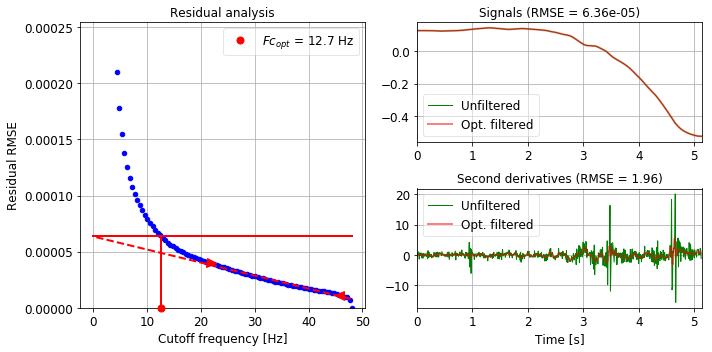

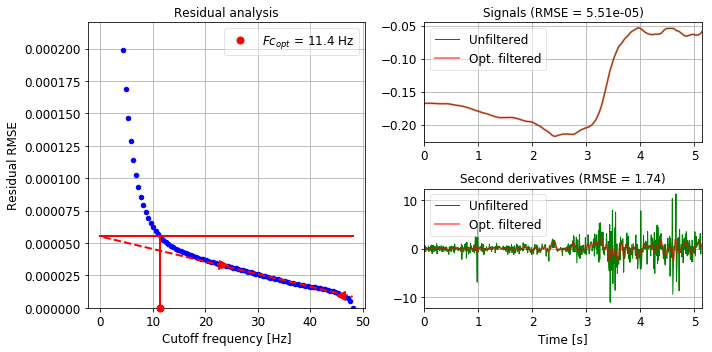

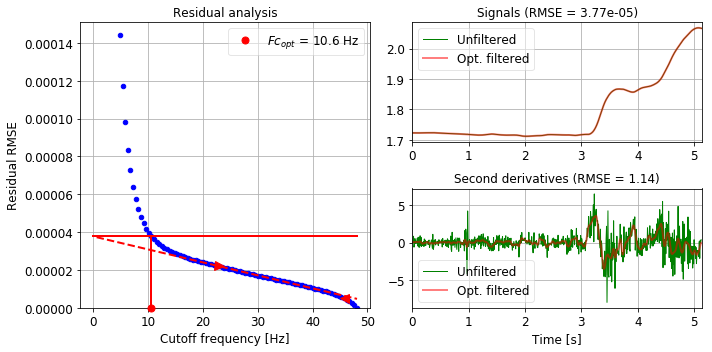

Marker name =  LWrist


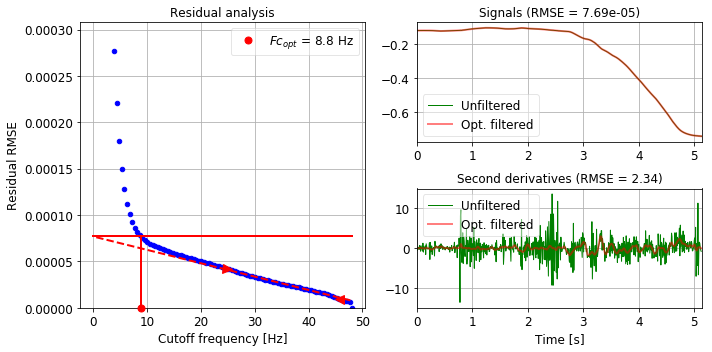

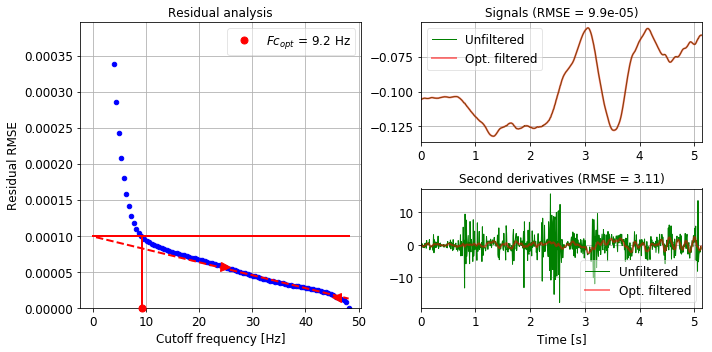

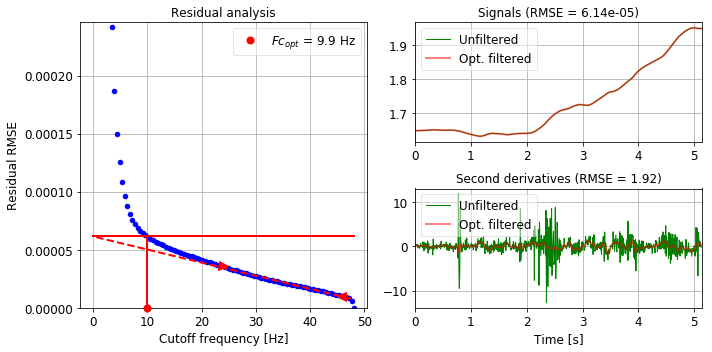

Marker name =  LRadius


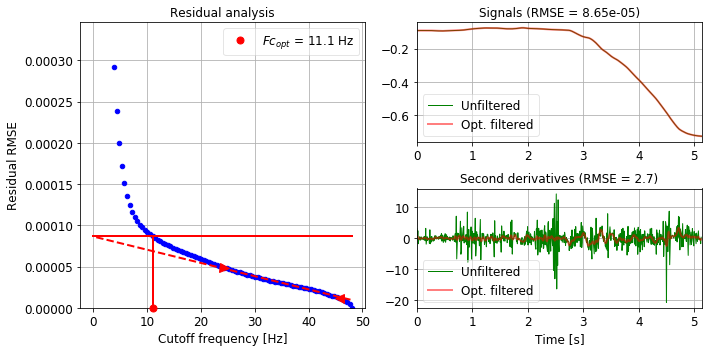

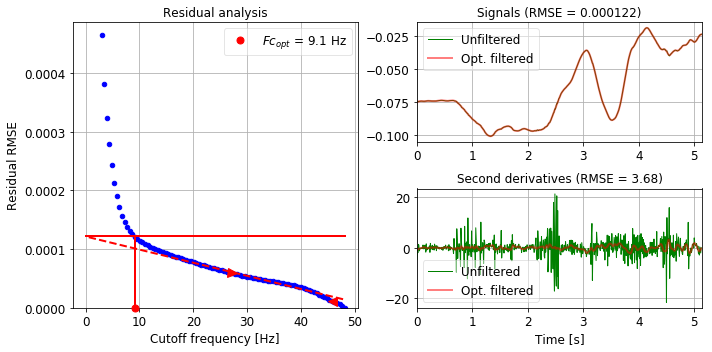

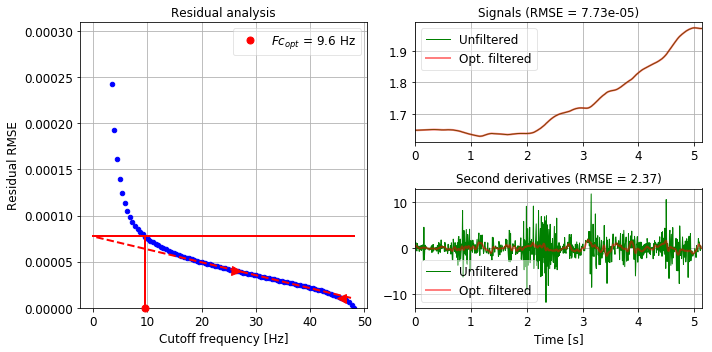

Marker name =  LUlna


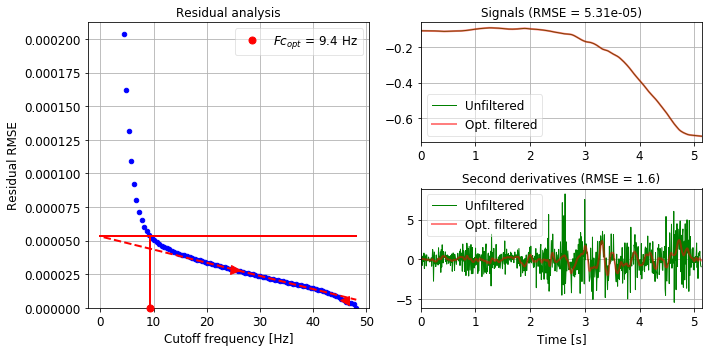

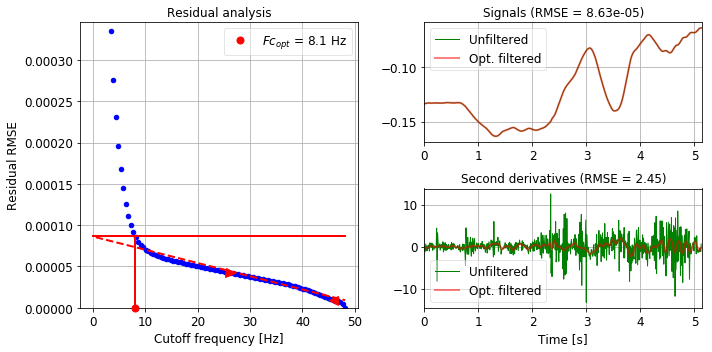

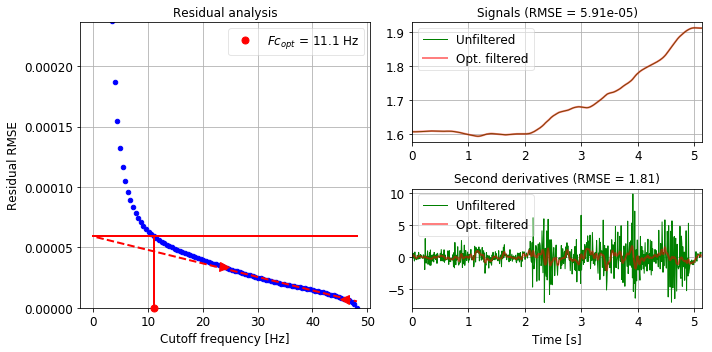

Marker name =  RThighSuperior


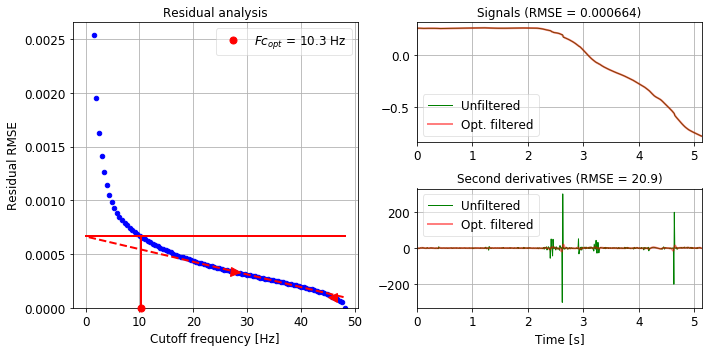

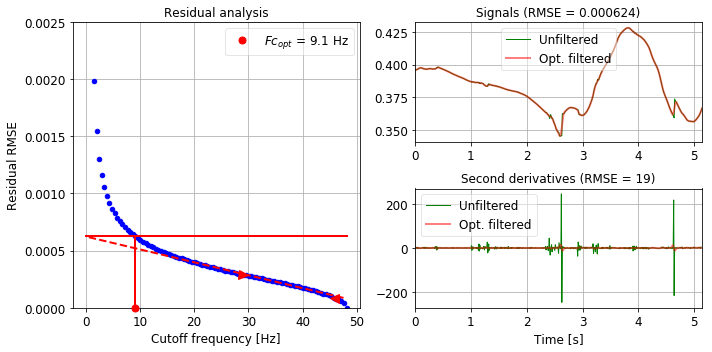

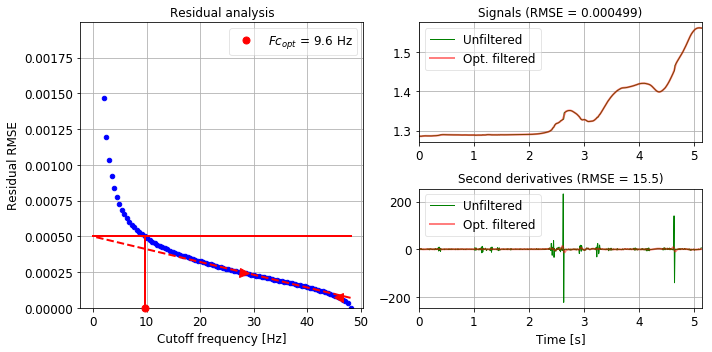

Marker name =  RThighInferior


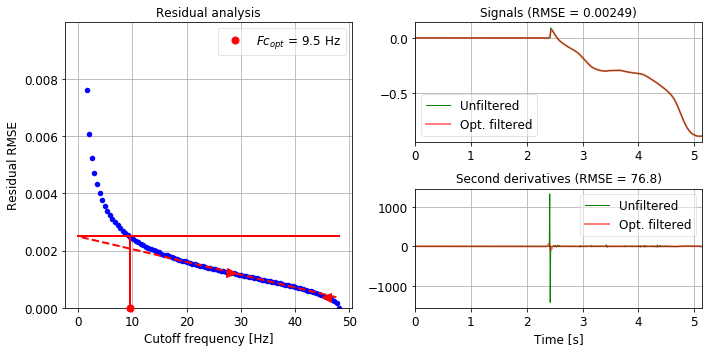

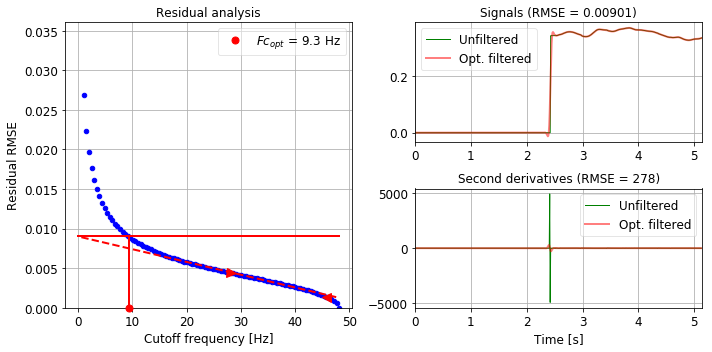

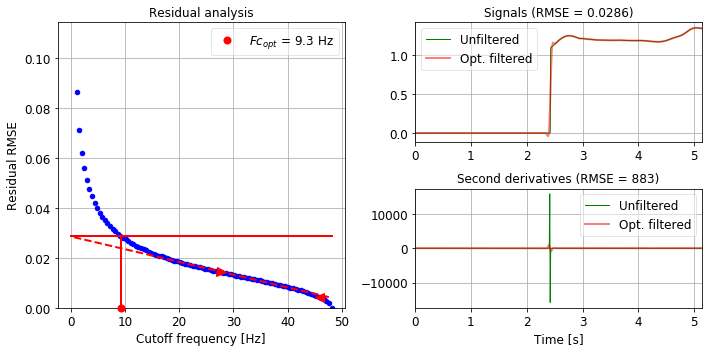

Marker name =  RThighLateral


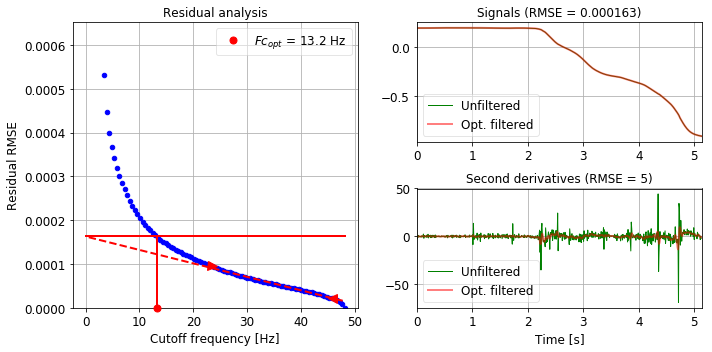

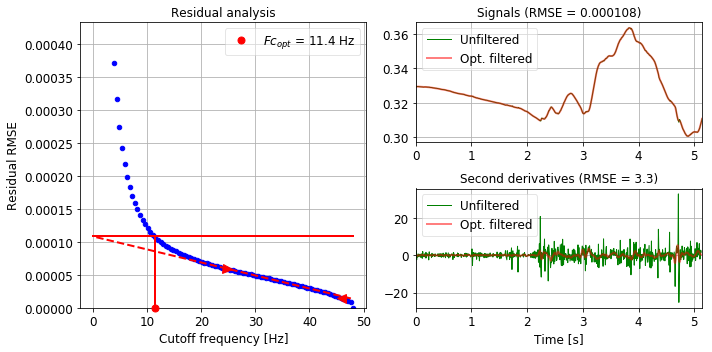

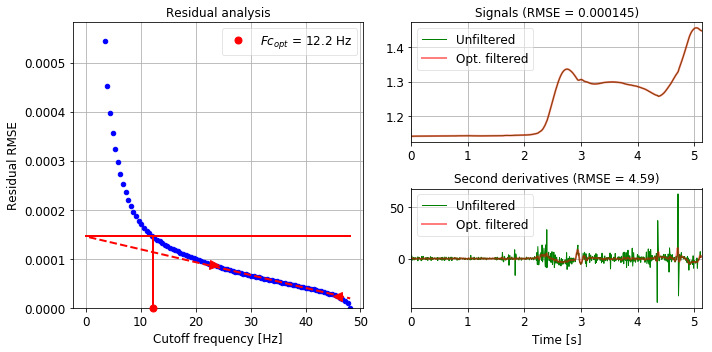

Marker name =  RShankSuperior


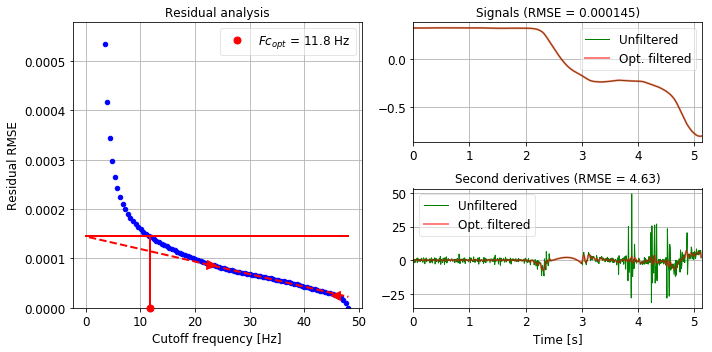

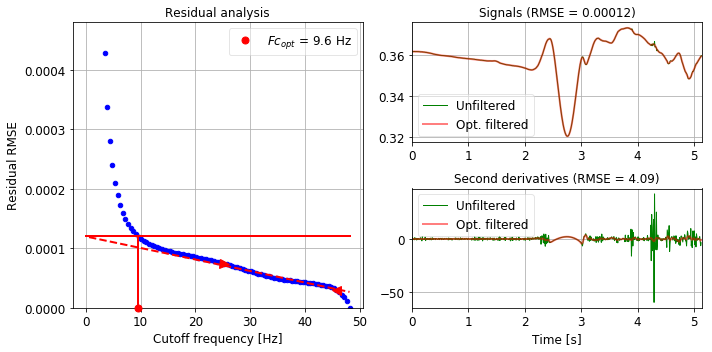

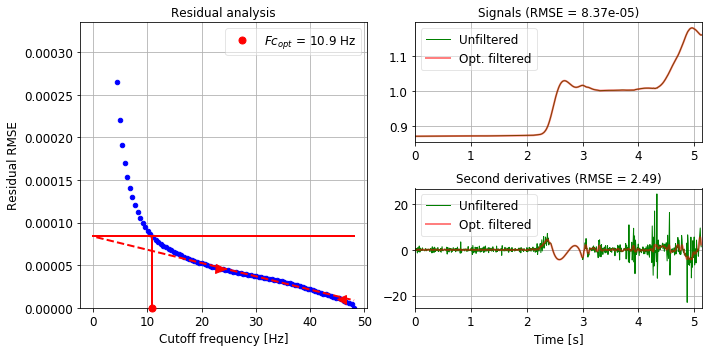

Marker name =  RShankInferior


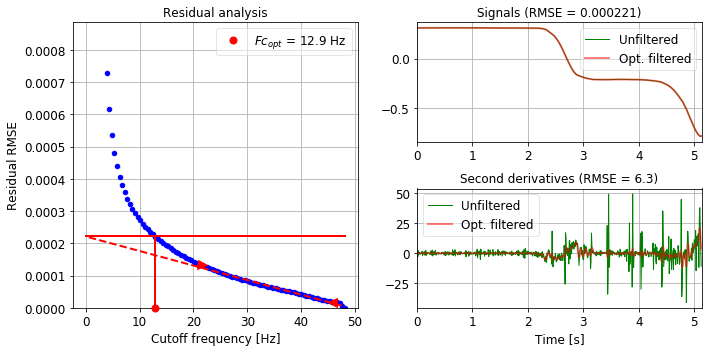

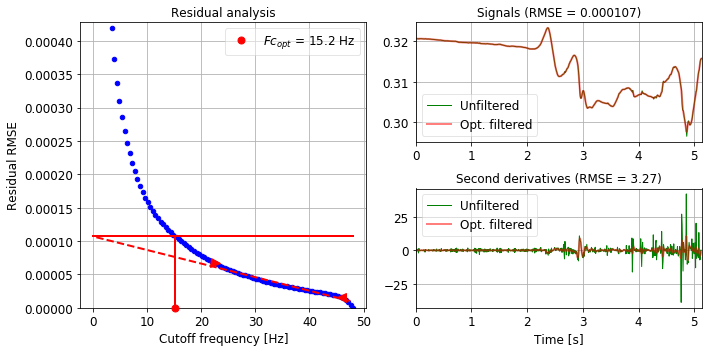

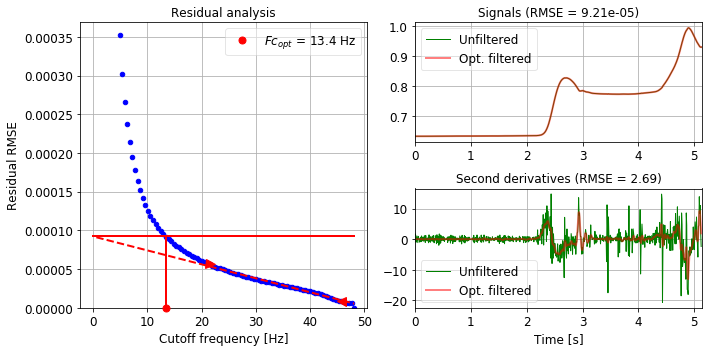

Marker name =  RShankLateral


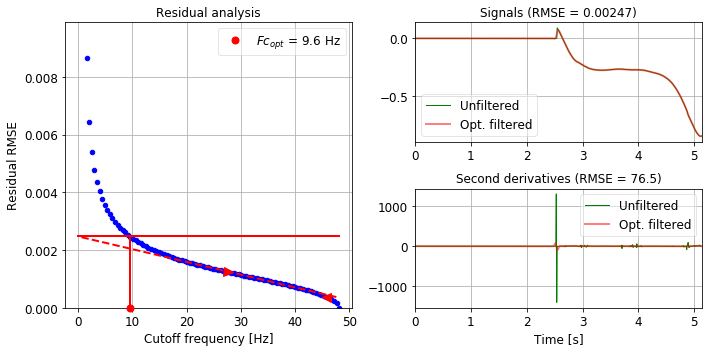

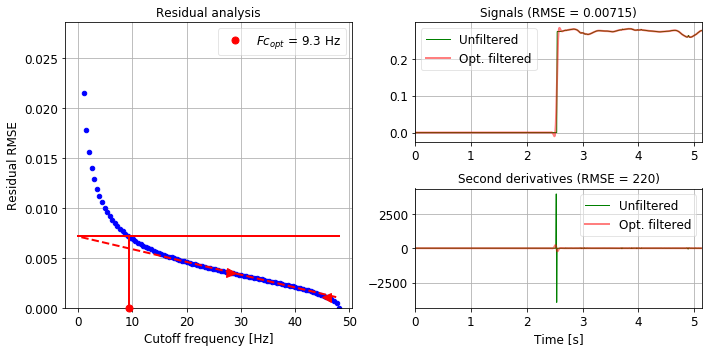

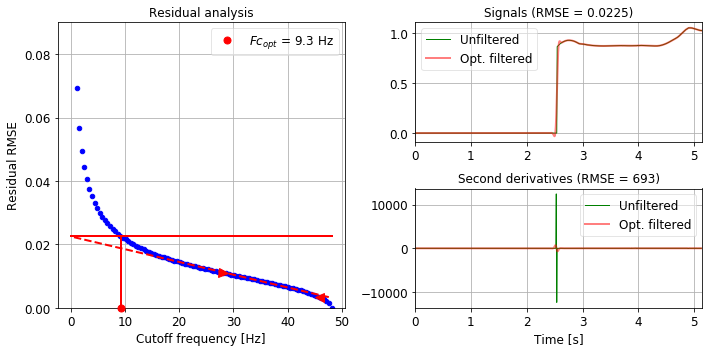

Marker name =  LThighSuperior


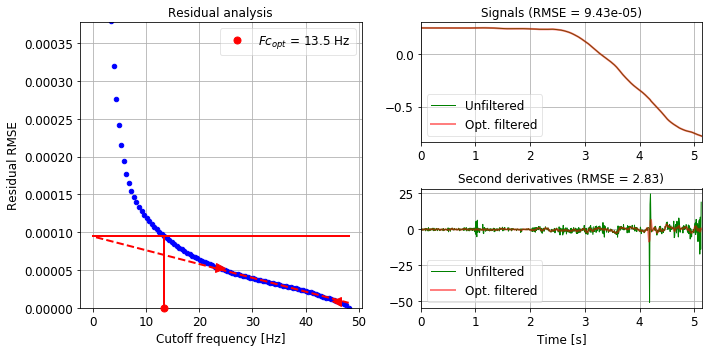

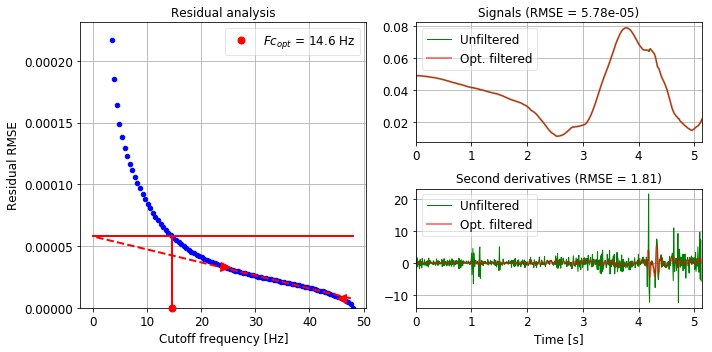

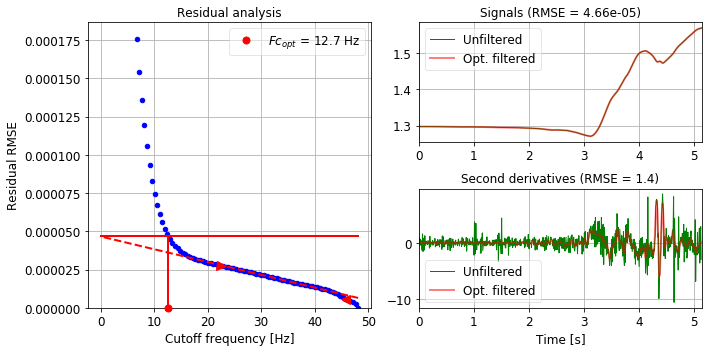

Marker name =  LThighInferior


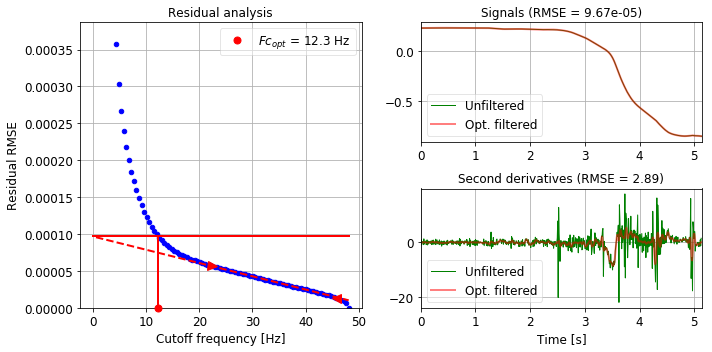

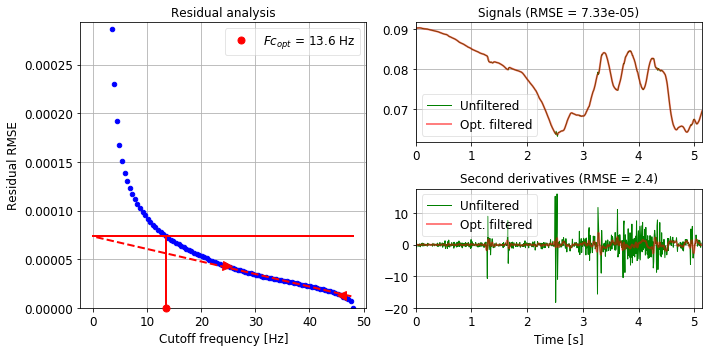

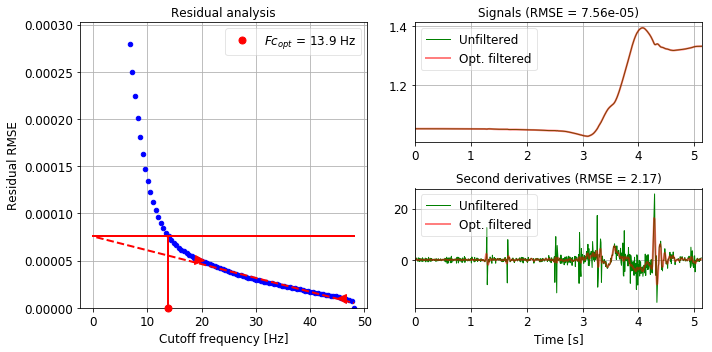

Marker name =  LThighLateral


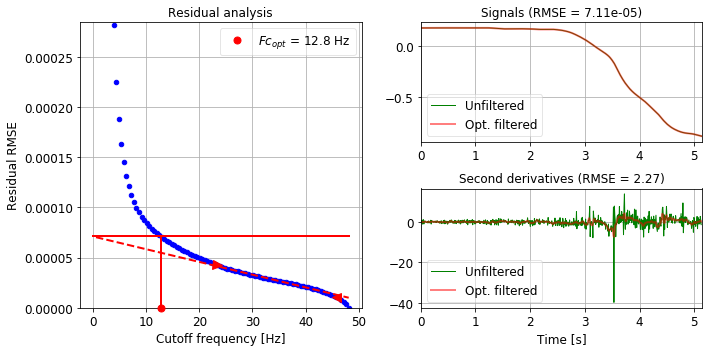

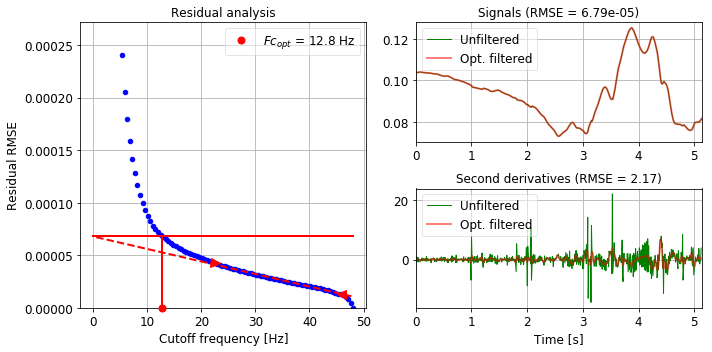

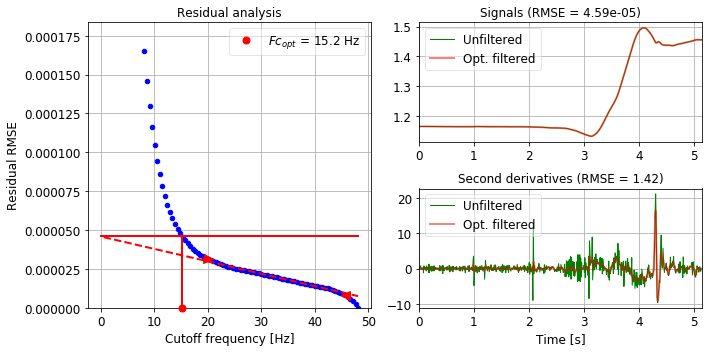

Marker name =  LShankSuperior


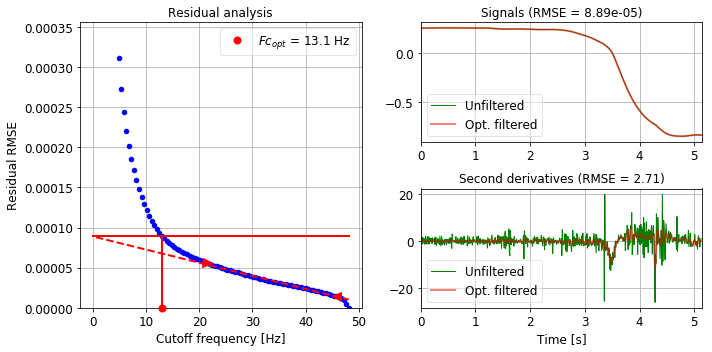

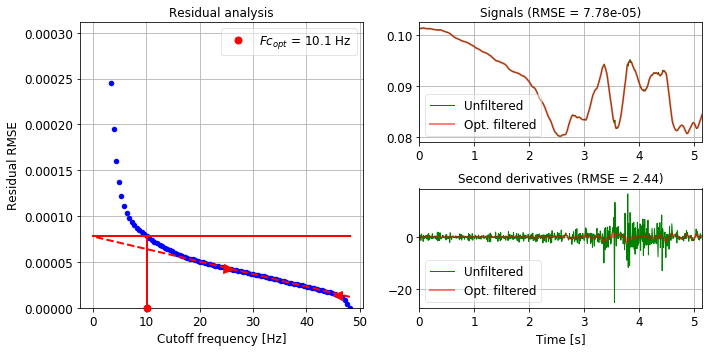

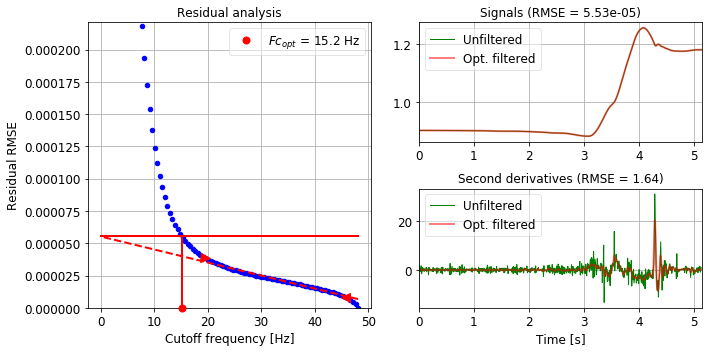

Marker name =  LShankInferior


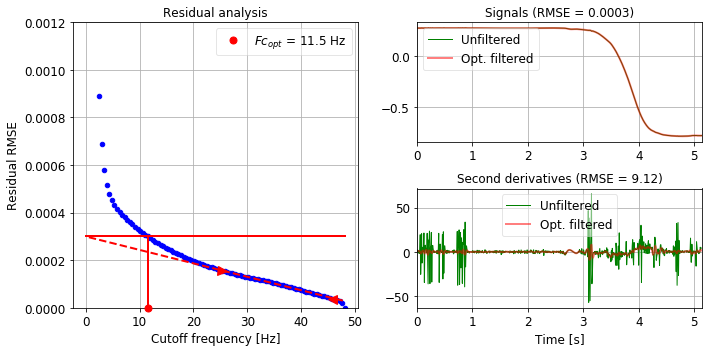

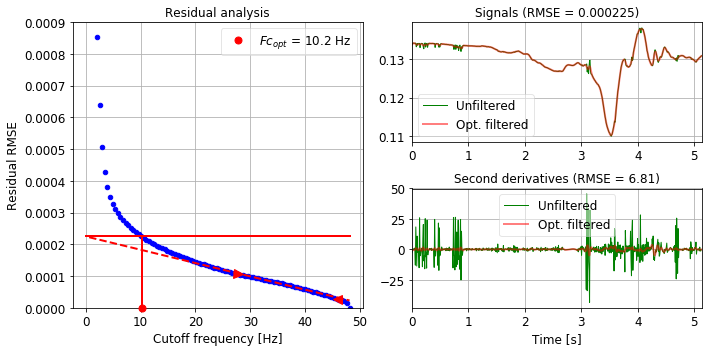

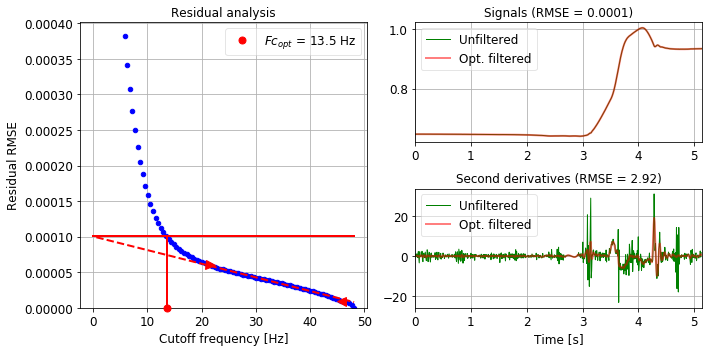

Marker name =  LShankLateral


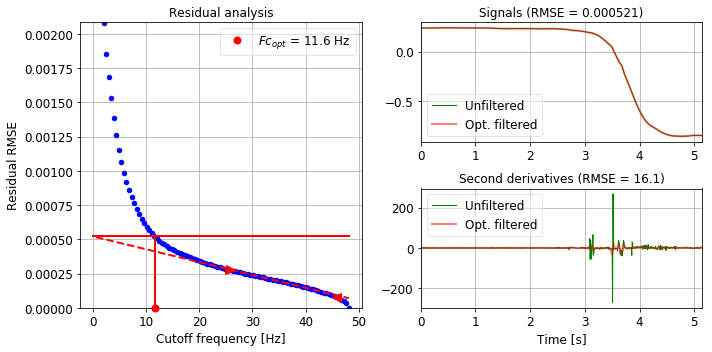

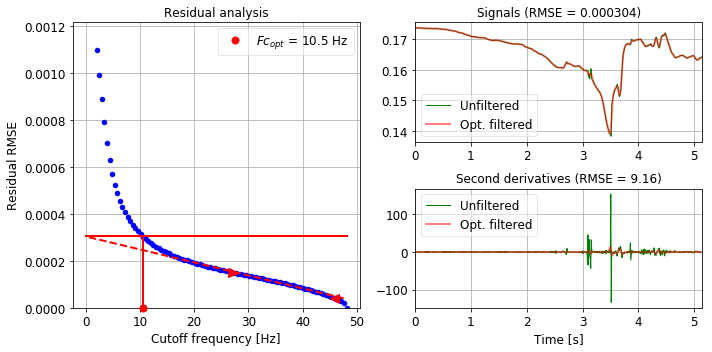

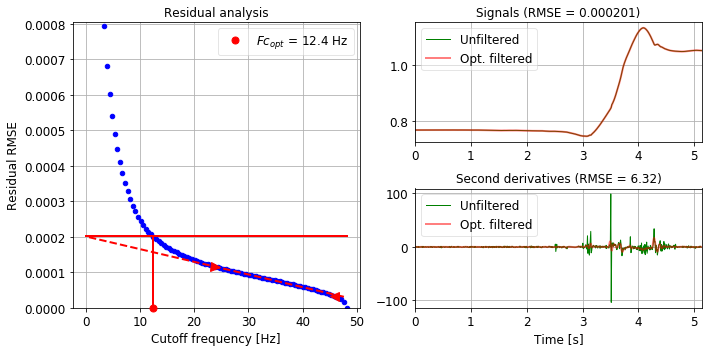

Marker name =  RHeel


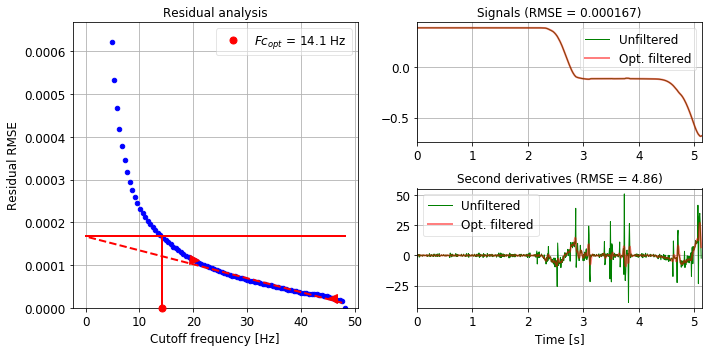

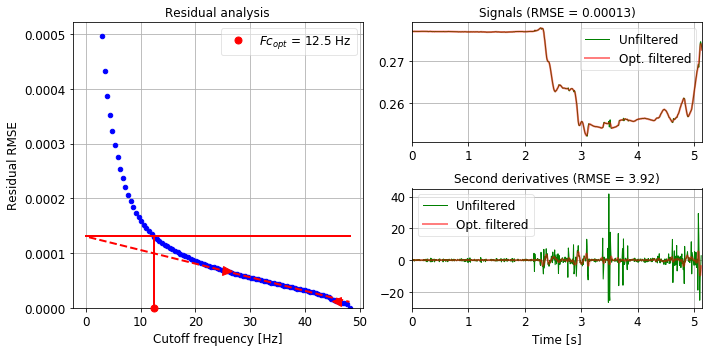

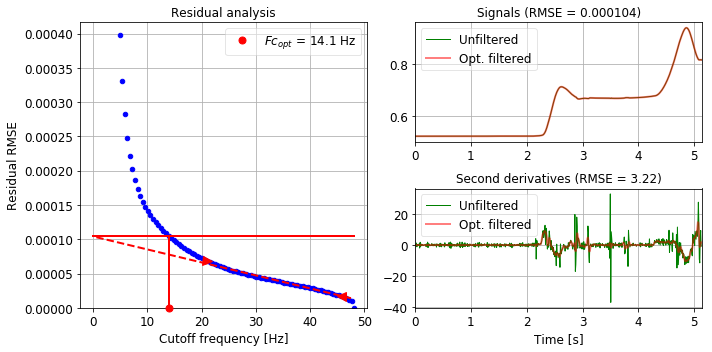

Marker name =  RToe


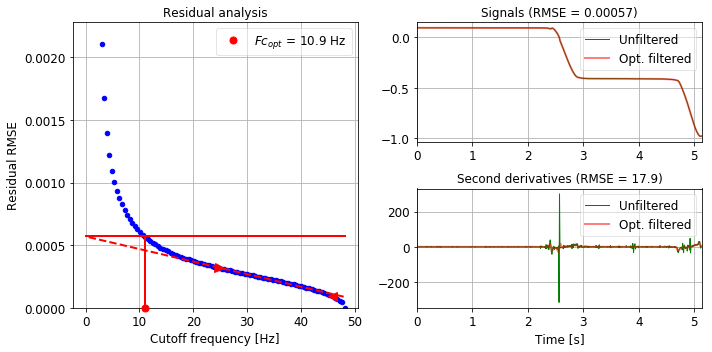

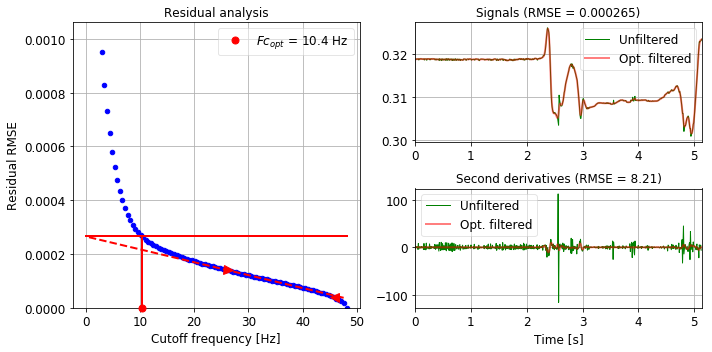

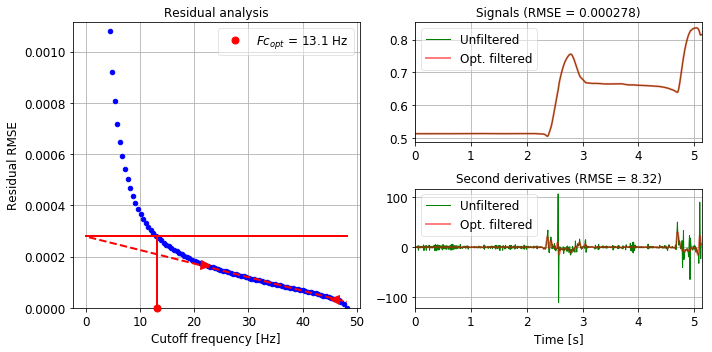

Marker name =  RToeMedial


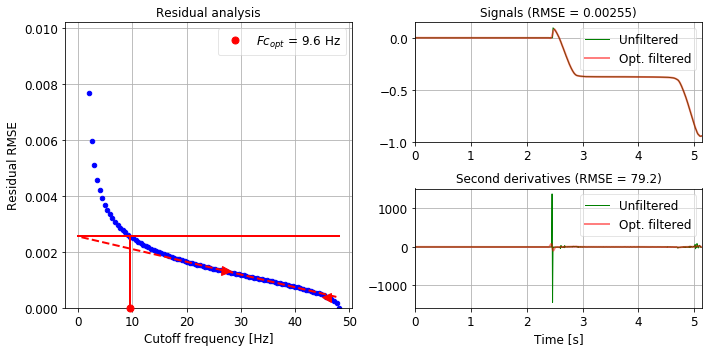

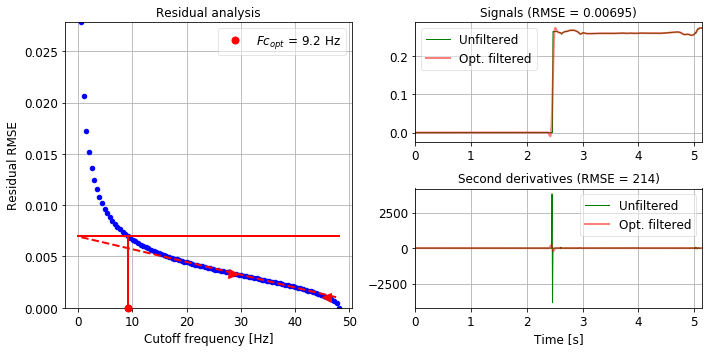

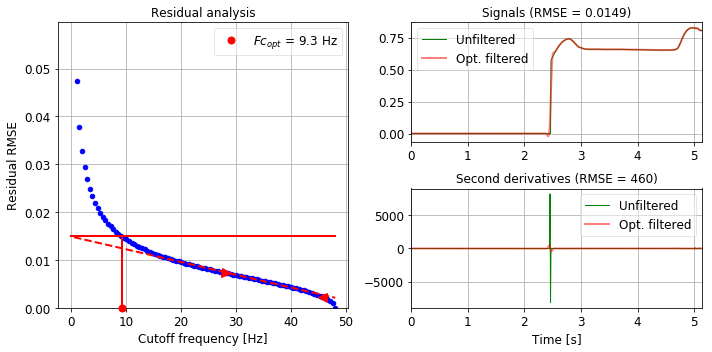

Marker name =  RToeLateral


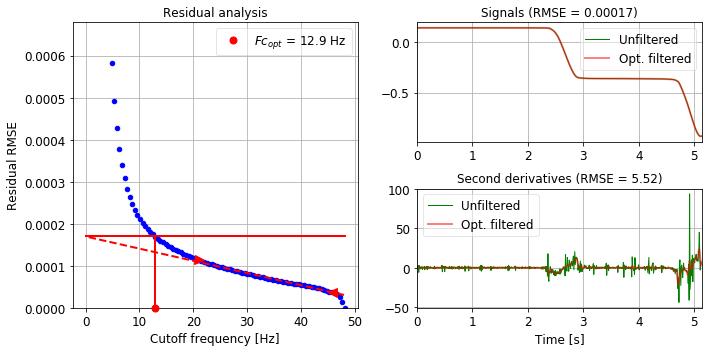

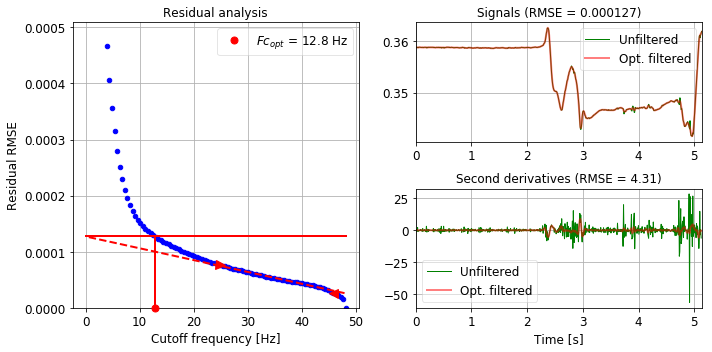

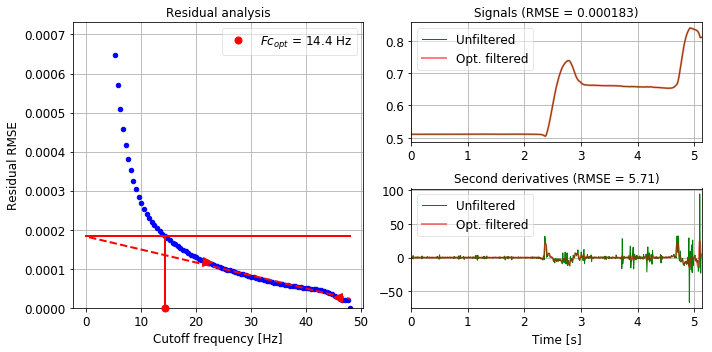

Marker name =  LHeel


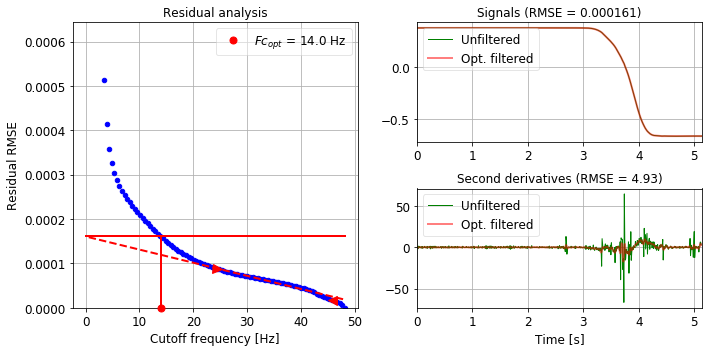

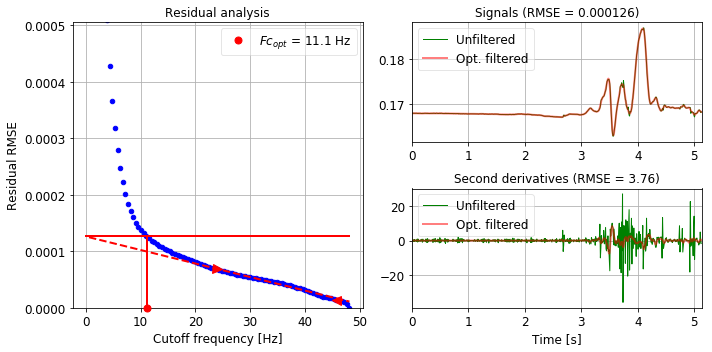

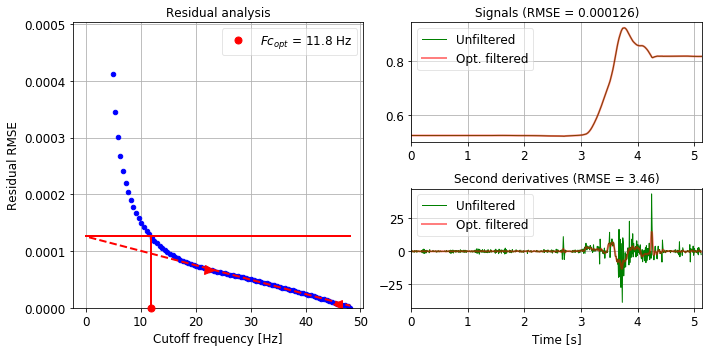

Marker name =  LToe


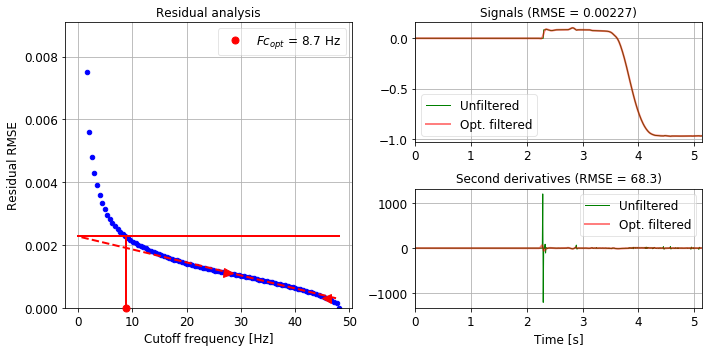

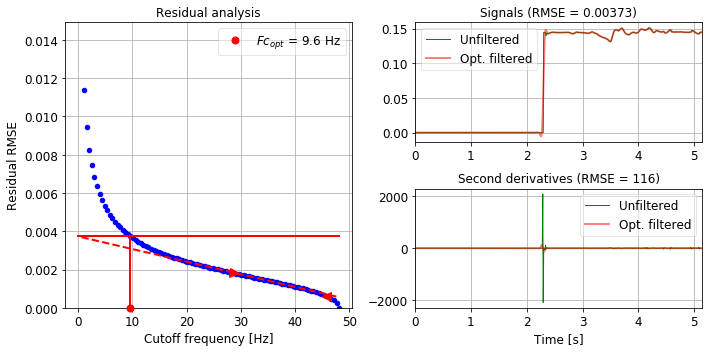

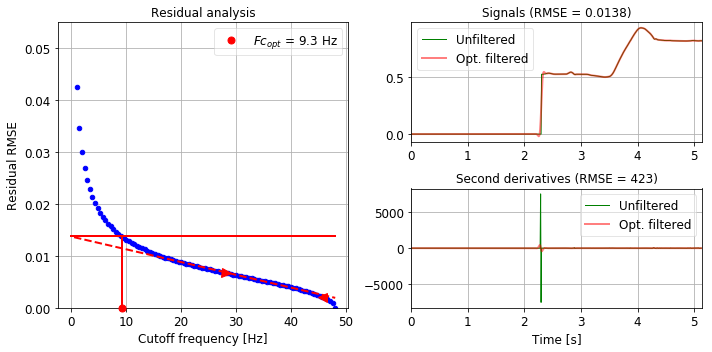

Marker name =  LToeMedial


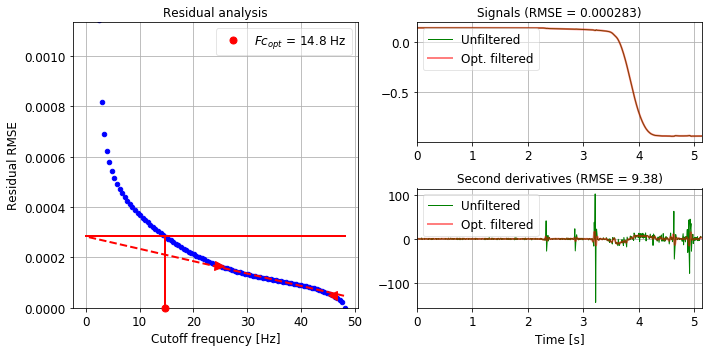

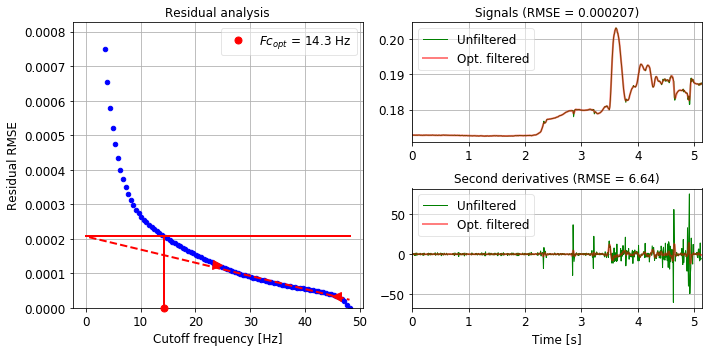

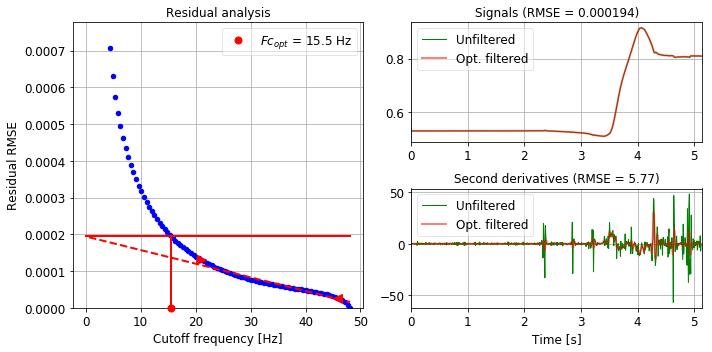

Marker name =  LToeLateral


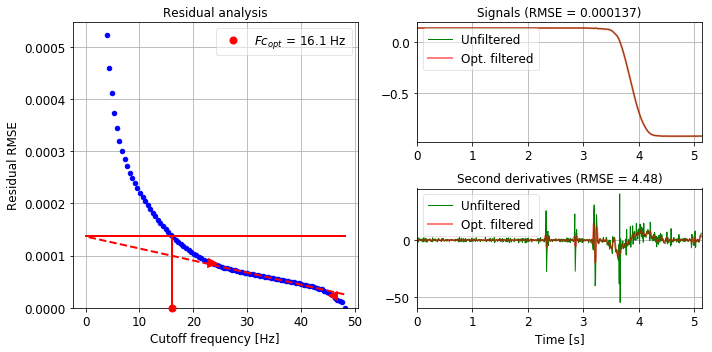

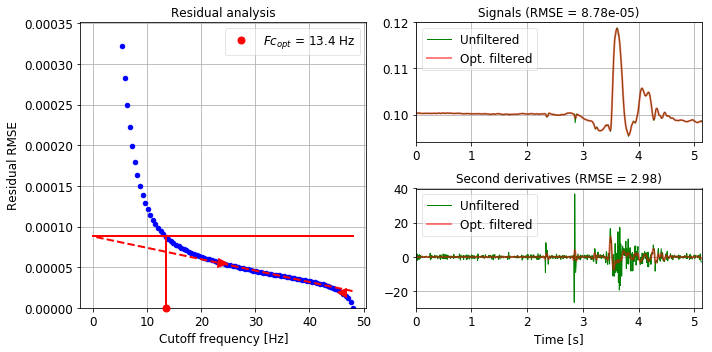

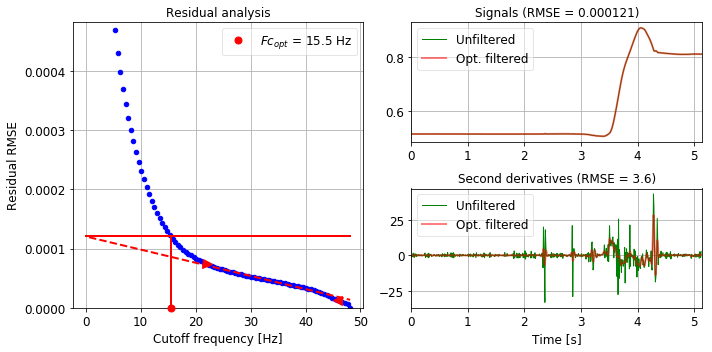

5.10991057524


In [6]:
Freq_Marker = result[0]['VideoFrameRate']
list_fc_opt_markers = []
for i in range(len(list_params_markers)):
    print('Marker name = ', list_markers[i])
    for col in range(3):
        arr = result[0][list_params_markers[i]][:, col]
        fc_opt = residual_analysis(arr, freq=Freq_Marker, show=True)
        list_fc_opt_markers.append(fc_opt)
        
print(min(list_fc_opt_markers))

In [7]:
Freq_Analog  = result[0]['VideoFrameRate'] * result[0]['NoAnalogSamplesPer3DFrame']
list_fc_opt_analogs = []
for i in range(len(list_params_analogs)):
    if list_analogs[i].startswith('M'):
        unit_conversion_rate = 1/1000
    else:
        unit_conversion_rate = 1.0
    arr = unit_conversion_rate * result[0][list_params_analogs[i]]
    fc_opt = residual_analysis(arr, freq=Freq_Analog, show=True)
    list_fc_opt_analogs.append(fc_opt)
        
print(list_fc_opt_analogs)

[11.41798125313187, 6.7752789619569045, 7.7341389989520968, 8.6914374426327612, 7.1159267231727963, None, 32.969541939770423, 26.134435739789019, 10.374912981232526, 16.697030205707009, 19.924469397801264, None]


Analog name =  Fx2


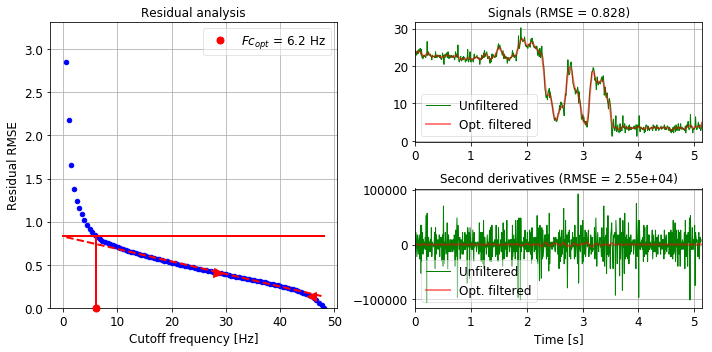

Analog name =  Fy2


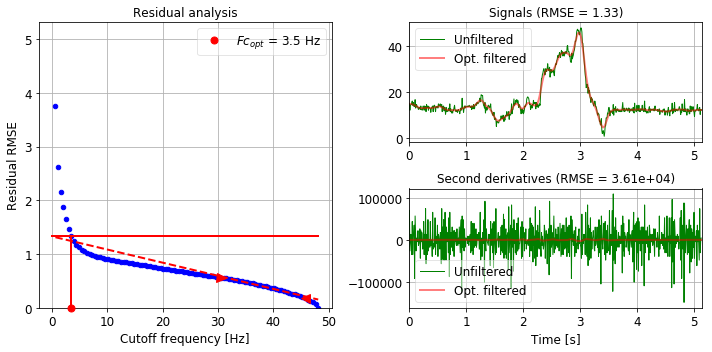

Analog name =  Fz2


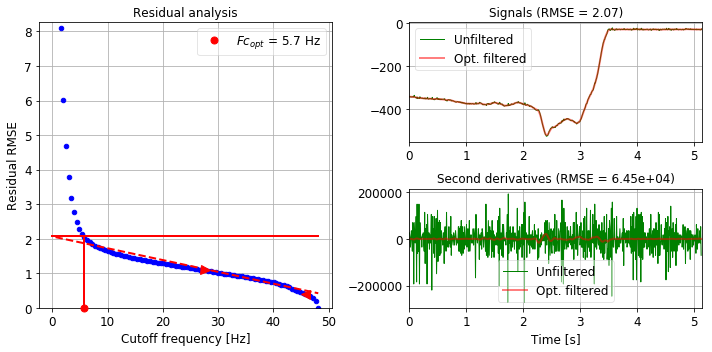

Analog name =  Mx2


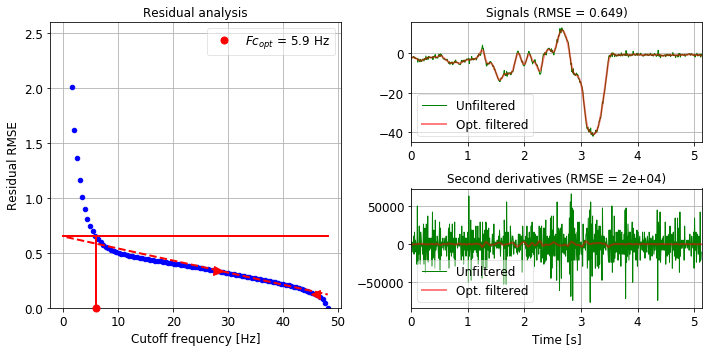

Analog name =  My2


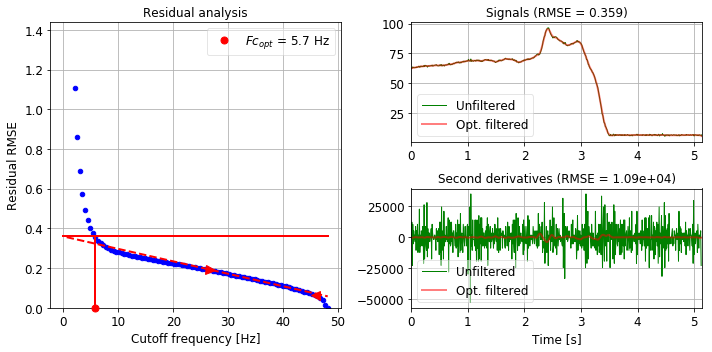

Analog name =  Mz2


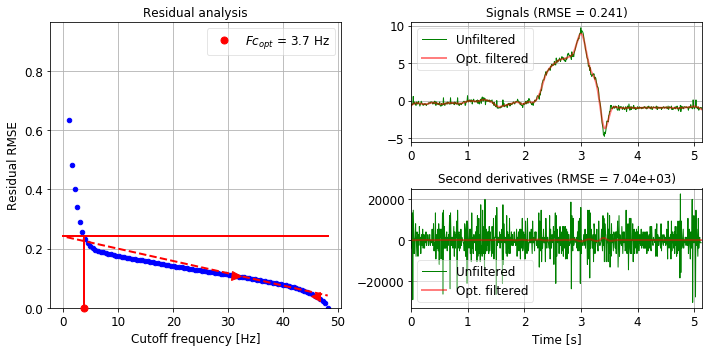

Analog name =  Fx1


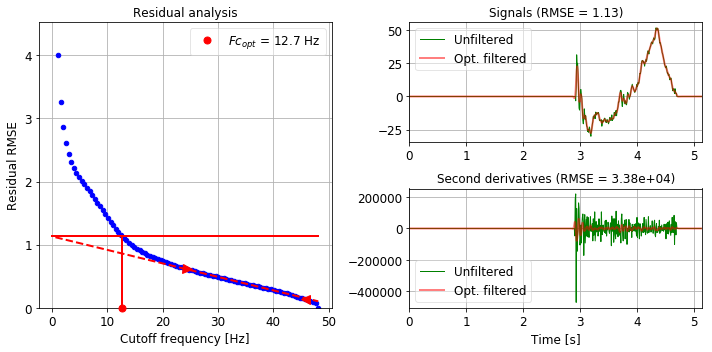

Analog name =  Fy1


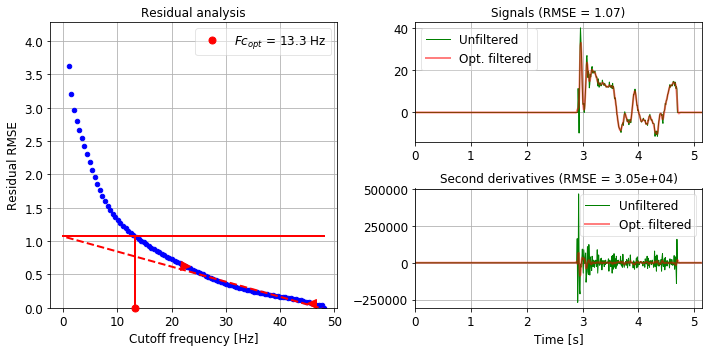

Analog name =  Fz1


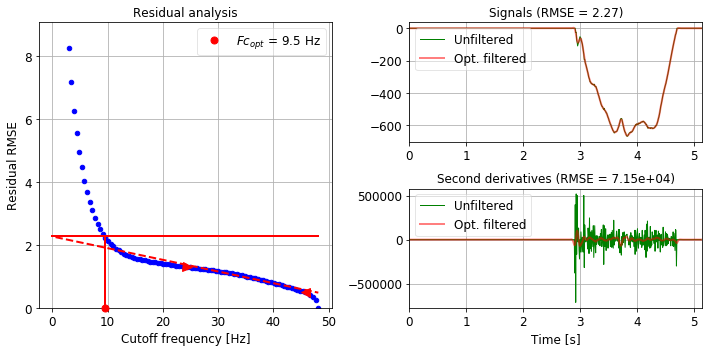

Analog name =  Mx1


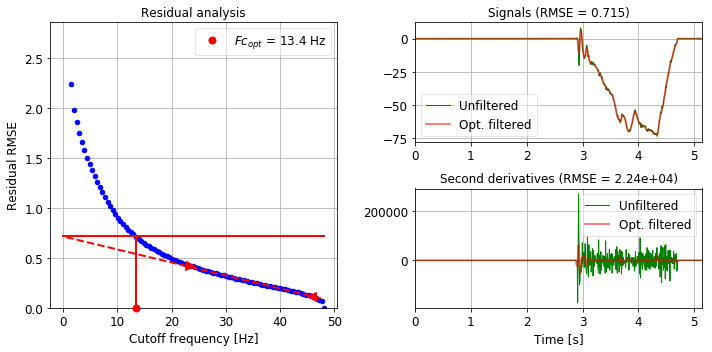

Analog name =  My1


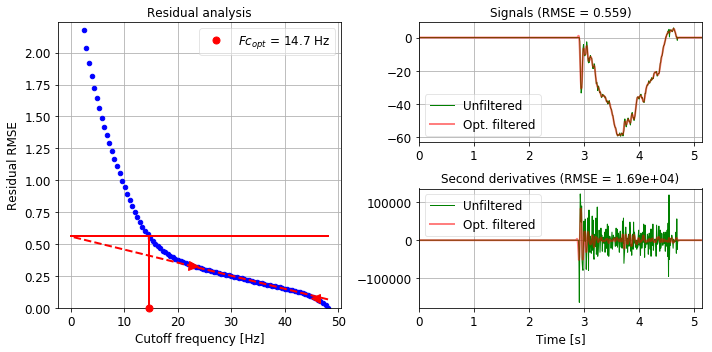

Analog name =  Mz1


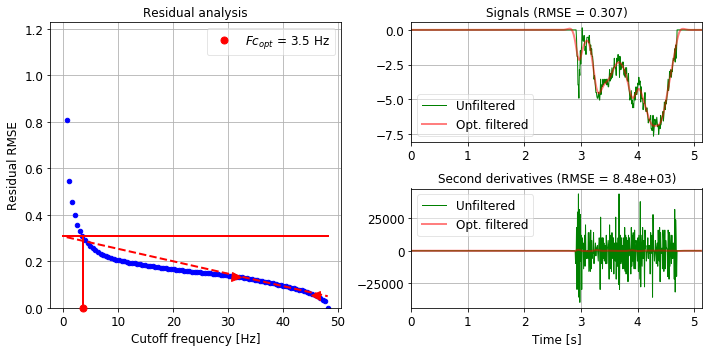

[6.1504227076131457, 3.4669000704920649, 5.6983142779994393, 5.9210409087856526, 5.6891810919873498, 3.7223030487718574, 12.718339970845282, 13.312420933686584, 9.4674485004010442, 13.383790533444126, 14.653377706608536, 3.5149103168441553]


In [8]:
Freq_Analog  = result[0]['VideoFrameRate'] * result[0]['NoAnalogSamplesPer3DFrame']
list_fc_opt_analogs = []
for i in range(len(list_params_analogs)):
    print('Analog name = ', list_analogs[i])
    if list_analogs[i].startswith('M'):
        unit_conversion_rate = 1/1000
    else:
        unit_conversion_rate = 1.0    
    arr = unit_conversion_rate * result[0][list_params_analogs[i]] 
    index_sampling = range(0, arr.size, result[0]['NoAnalogSamplesPer3DFrame'])   
    arr2 = arr[index_sampling]
    fc_opt = residual_analysis(arr2, freq=Freq_Analog/result[0]['NoAnalogSamplesPer3DFrame'], show=True)
    list_fc_opt_analogs.append(fc_opt)
        
print(list_fc_opt_analogs)